# Prepi Lead Scoring

## Importing libraries

---



---



In [581]:
pip install unidecode

In [582]:
# Importando bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.graph_objs import *
import datetime
from sklearn.preprocessing import LabelEncoder, scale
from unidecode import unidecode

In [583]:
# Montando drive de conexão com o Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Reading dataset

In [584]:
# Importando dataset tratado
prepi = pd.read_csv('/content/drive/MyDrive/DNC- GP18/PREPI/Dados_leads/dataset/dataset_v2_tratado.csv', delimiter=';', header=0, encoding='utf-8', quotechar='"', quoting=1)

<ipython-input-584-229467e1e19e>:2: DtypeWarning:

Columns (72) have mixed types. Specify dtype option on import or set low_memory=False.



In [585]:
prepi.sample(10)

,id,lead_dt_cadastro,lead_hr_cadastro,lead_num_semana_cadastro,lead_hash_nome_loja,lead_hash_nome,lead_hash_instagram,lead_hash_email,lead_hash_whatsapp,lead_fluxo,...,user_estado,user_p1,user_p2,user_p3,user_p4,user_p5,user_diagnostico,user_dt_diagnostico,user_val_cac,lead_num_idade
25308,25308,2022-10-18,19:31:31,43.0,NaN,cc153e8e856950420cc9f21c7eb72aa57124ab8eb35edd...,c6a9d7b6d42c6c5294b14aa835e210ea0ad7d7192b7f47...,ee7e00e8867a154bb05270c04358d213288c0ddd4c0407...,91e45b8943783eeebf11453ad0b676c43089c0c2bba786...,td,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.48,NaN
11081,11081,2022-09-02,18:15,7.0,NaN,cf1cfc021e5932a7d92797c0870345affd641a26ef091f...,dc385336c3f440e1bcace8a1bd706800617b6cfc4eed5a...,31c2f8e03facd3546fe270f414c000ad461bfd49382287...,e7ea2e6ec5389b332109d9ae562465bd76fdc803fd5dec...,td,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.84,NaN
4177,4177,2021-08-30,22:57,36.0,NaN,2bc9b0bfda88d715b2d504977b608202fe9caf607d4d4e...,d183f20d1e7ceaa080b610d8eafaf86d926664db88d771...,ac6de76fe48ae2f2cfe56efd84c2d56092d9e362e186a8...,51524b5caca94976a82ace82770b97efede8edff73128e...,td,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.39,NaN
4459,4459,2021-02-09,11:34,40.0,NaN,9686dd714b1b2c46dacc6e62e6ffdfdf76981cf0e6de30...,0c002cdfe3dd5550bb3d05d0a6797c27ffd7c9f26d23ac...,17a06f146600a40771817918ebb737cc30eff90ca8561c...,495757fdf07615dc1262d963a31633e434edd816e2ebd0...,td,...,ce,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.0
17500,17500,2022-06-14,11:39:35,25.0,9333f0853534988ef9bd4f37a0cabaf6ecefdfc45fb531...,be83dbb7fc72280b021336f48b5a8b0f593672d58536bb...,f996fb03b77254ecb6a9b6e6160ef87e7d728d6c9a5548...,9dcbfecd4eeab0245a28a706e8fa80382f41b64b3405e6...,5c2bb4229a24c175ff13eeeaf4232b58f3e4862a229f7c...,td,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.52,NaN
30855,30855,2023-01-27,9:50:06,4.0,fd4eddf626ad5c802d5dbd42d8a5931baf425ce902b2c1...,76cd7f97e8814fdb3a4e9533c2faacb0b4bb95f2cbd00a...,0e5a4a337462f79753bf23267fec77cc9984b3a7df6a4c...,5e548bcfd0a39e05393591ee2cd875f501365face505a0...,d201fe0f80018289028eb021f7f3bbce811545d7067509...,plg,...,NaN,comecei agora minha loja,até 3 meses,😕 desmotivada (o),a loja não fatura suficiente ainda,NaN,loja master,2023-01-27 09:58:49,5.73,20.0
27026,27026,2022-11-13,14:43:40,47.0,fd63fcb87f4ae5d1bc5b1da7a620659a56acd91c14551d...,1e260dfe0881801e288e55642580d4114f6c0de8ea1417...,ca696cc2aba1561fbdfcca2e5d46d74ec2c407c4572b23...,d622905eefe8cd6978fe30bd0d21698afe55bdba00ec44...,8d4ff46ddfe1cb05d46536e7a268a2889759cc8614cf67...,plg,...,NaN,comecei agora minha loja,até 3 meses,😰 desesperada (o),a loja não fatura suficiente ainda,NaN,loja master,2022-11-13 18:46:56,5.97,19.0
15938,15938,2022-05-14,21:41:40,20.0,NaN,06d665666a75c220750f8c94f7c121350419863e2acf10...,779dc541e8a8775dfe26e32c956273cdd6ef91734cfd0b...,709c3bfc3c4f580a0fdb1f944a7eaf3db116316c91b518...,4fa6dc27b4ef82393a31041653b1a5cbabab8fc75854a7...,td,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.94,NaN
7894,7894,2021-10-24,18:45,44.0,2348893628c18948a601cec75b138a4f7ef109928c0e6c...,dad5bbc4574e9192cee9da530b03d73fe8a5760ac19905...,4fc940b38f7c85cd4ce177d5f10012b1329b8045162096...,bc1ef342540a65bb60cf9e819b16da62bf36900cca80f5...,dac8ffcd4cab47347ea9cf28be9abe500c31016f282962...,td,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.59,NaN
7519,7519,2021-10-13,14:21,42.0,c6f39fe1583f53468f4c6b152ad079703e0d48e6e52b60...,a8e7eca5670edfa267191eb55f8285f464efb2335f3e8c...,47c59ff343b3b5fbce6fd42d5fe7c7cbbf1d5464dd4d40...,fac2794d7899dac51c450f08d412a59a2e8b616c7071ae...,d18b22e48ec066bda6122c77153dfdb15b9e0223debe05...,td,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.16,NaN


In [586]:
prepi.columns

Index(['id', 'lead_dt_cadastro', 'lead_hr_cadastro',
       'lead_num_semana_cadastro', 'lead_hash_nome_loja', 'lead_hash_nome',
       'lead_hash_instagram', 'lead_hash_email', 'lead_hash_whatsapp',
       'lead_fluxo', 'lead_tamanho_negocio', 'lead_utm_source',
       'lead_utm_medium', 'lead_utm_campaign', 'lead_utm_content',
       'lead_lp_version', 'lead_referrer', 'lead_city', 'lead_region',
       'lead_flag_became_client', 'lead_flag_became_user',
       'instagram_num_followers', 'instagram_num_feed_posts',
       'instagram_hash_foto_perfil', 'instagram_hash_bio',
       'instagram_hash_bio_link', 'instagram_num_frequencia_posts',
       'instagram_flag_postou_recente', 'instagram_flag_postou_muito_recente',
       'instagram_dt_criacao_estimada', 'instagram_num_overall_engajamento',
       'instagram_num_avarage_comments', 'instagram_num_avarage_likes',
       'instagram_num_reels_counts', 'instagram_num_avergae_reelplay',
       'instagram_num_avergae_reelsview', 'instagra

## Adjusting 'P1', 'P2', 'P3', 'P4', 'P5'

In [587]:
prepi.columns

Index(['id', 'lead_dt_cadastro', 'lead_hr_cadastro',
       'lead_num_semana_cadastro', 'lead_hash_nome_loja', 'lead_hash_nome',
       'lead_hash_instagram', 'lead_hash_email', 'lead_hash_whatsapp',
       'lead_fluxo', 'lead_tamanho_negocio', 'lead_utm_source',
       'lead_utm_medium', 'lead_utm_campaign', 'lead_utm_content',
       'lead_lp_version', 'lead_referrer', 'lead_city', 'lead_region',
       'lead_flag_became_client', 'lead_flag_became_user',
       'instagram_num_followers', 'instagram_num_feed_posts',
       'instagram_hash_foto_perfil', 'instagram_hash_bio',
       'instagram_hash_bio_link', 'instagram_num_frequencia_posts',
       'instagram_flag_postou_recente', 'instagram_flag_postou_muito_recente',
       'instagram_dt_criacao_estimada', 'instagram_num_overall_engajamento',
       'instagram_num_avarage_comments', 'instagram_num_avarage_likes',
       'instagram_num_reels_counts', 'instagram_num_avergae_reelplay',
       'instagram_num_avergae_reelsview', 'instagra

In [588]:
# Correcting the columns 'P1', 'P2', 'P3, 'P4, 'P5'

prepi_questions = prepi[['id','user_p1','user_p2','user_p3','user_p4','user_p5']]
prepi_questions = prepi_questions[prepi_questions['user_p5'].notna()]
prepi_questions

for i in prepi_questions['id']:
  prepi.loc[prepi['id'] == i, 'user_p1'] = prepi.loc[prepi['id'] == i, 'user_p2']
  prepi.loc[prepi['id'] == i, 'user_p2'] = prepi.loc[prepi['id'] == i, 'user_p3']
  prepi.loc[prepi['id'] == i, 'user_p3'] = prepi.loc[prepi['id'] == i, 'user_p4']
  prepi.loc[prepi['id'] == i, 'user_p4'] = prepi.loc[prepi['id'] == i, 'user_p5']
  display(prepi.loc[prepi['id'] == i])
  print('====================================')

,id,lead_dt_cadastro,lead_hr_cadastro,lead_num_semana_cadastro,lead_hash_nome_loja,lead_hash_nome,lead_hash_instagram,lead_hash_email,lead_hash_whatsapp,lead_fluxo,...,user_estado,user_p1,user_p2,user_p3,user_p4,user_p5,user_diagnostico,user_dt_diagnostico,user_val_cac,lead_num_idade
13007,13007,2022-03-22,21:15,13.0,NaN,6c1cd7f241e3fdd401d6e73e9c1eb7d7673191a8dbf89d...,4368a228b337bf6cb10d682e4cc1aca34d0d4661dbc616...,580fdeb6b48934d5f76b5aeed30d87b4563155ec551966...,73f1d31a401792c581f5686dcb161bb0b56d2e308320f4...,td,...,NaN,comecei agora minha loja,até 3 meses,😕 desmotivada (o),a loja não fatura suficiente ainda,a loja não fatura suficiente ainda,NaN,NaN,NaN,NaN


,id,lead_dt_cadastro,lead_hr_cadastro,lead_num_semana_cadastro,lead_hash_nome_loja,lead_hash_nome,lead_hash_instagram,lead_hash_email,lead_hash_whatsapp,lead_fluxo,...,user_estado,user_p1,user_p2,user_p3,user_p4,user_p5,user_diagnostico,user_dt_diagnostico,user_val_cac,lead_num_idade
13051,13051,2022-03-22,18:02,13.0,NaN,3aa527c83af569705431bd40fac72c32e7da99f8fbcae0...,432038731040426b1aa957bf5f4022ca830ccb1fc7d496...,c2359c2004c4c0644ae4ec15d8f80425d28c9620d9ca0f...,887523c0100226680b9b0d0eb1be4684a2cb448854c132...,td,...,rj,comecei agora minha loja,até 3 meses,😀 animada (o),a loja não fatura suficiente ainda,a loja não fatura suficiente ainda,NaN,2022-04-08 11:08:06,236.56,24.0


,id,lead_dt_cadastro,lead_hr_cadastro,lead_num_semana_cadastro,lead_hash_nome_loja,lead_hash_nome,lead_hash_instagram,lead_hash_email,lead_hash_whatsapp,lead_fluxo,...,user_estado,user_p1,user_p2,user_p3,user_p4,user_p5,user_diagnostico,user_dt_diagnostico,user_val_cac,lead_num_idade
13855,13855,2022-07-04,22:09,14.0,NaN,d594e2651afd0862878a22b78a799ae2e68b8dcf298442...,94d081a57b35c7eeb358f69957d02b2abd93ac14bf4e22...,705038feb59c680fc5b5e63a71d673c11f52d0d7a92d1a...,818e70a9fcb02e52f5ab9da85567f591fb9eb885ace5d4...,td,...,pr,até r$ 1000,entre 3 meses e 1 ano,😕 desmotivada (o),minha renda extra vem da loja,minha renda extra vem da loja,NaN,NaN,106.23,22.0


,id,lead_dt_cadastro,lead_hr_cadastro,lead_num_semana_cadastro,lead_hash_nome_loja,lead_hash_nome,lead_hash_instagram,lead_hash_email,lead_hash_whatsapp,lead_fluxo,...,user_estado,user_p1,user_p2,user_p3,user_p4,user_p5,user_diagnostico,user_dt_diagnostico,user_val_cac,lead_num_idade
13871,13871,2022-08-04,01:21,15.0,NaN,d82db67b56e1fbfa4d19cfcb1e87c7fdc0cb921b411270...,1ffbaa29d6638b0f0035545ddb7c93f3a3163dca6ecbb4...,96b4ba53cd7ad685149707eed66eb56fa5f979a3cecf5c...,42f8c62821890877ed3c010c409284164263b14b0ce728...,plg,...,NaN,até r$ 1000,até 3 meses,😕 desmotivada (o),a minha renda total vem da loja,a minha renda total vem da loja,NaN,NaN,4.62,21.0


,id,lead_dt_cadastro,lead_hr_cadastro,lead_num_semana_cadastro,lead_hash_nome_loja,lead_hash_nome,lead_hash_instagram,lead_hash_email,lead_hash_whatsapp,lead_fluxo,...,user_estado,user_p1,user_p2,user_p3,user_p4,user_p5,user_diagnostico,user_dt_diagnostico,user_val_cac,lead_num_idade
13882,13882,2022-08-04,09:09,15.0,NaN,e457c34a6bac2e06e7eff9066e2e00245a9d41a6fbb2b1...,0c2d51c51601d62eb292de39eb3d9ba156396caea37d34...,8b31a61d3554a5b5b1057c2ca7b43b8b6112858f4b2e7b...,2684e2830801a141cf29c38b3fb2f16ce065e0f022d7ec...,plg,...,rs,entre r$ 1000 e r$ 10k,há mais de 2 anos,😀 animada (o),a minha renda total vem da loja,a minha renda total vem da loja,NaN,NaN,4.62,42.0


In [589]:
# Eliminating column P5
prepi = prepi.drop('user_p5',axis=1)

## Selecting features for Lead Scoring

In [590]:
prepi_scoring = prepi[[
                 'id',
                 'lead_hr_cadastro',
                 'lead_num_semana_cadastro',
                 'lead_fluxo',
                 'lead_tamanho_negocio',
                 'lead_utm_source',
                 'lead_utm_medium',
                 'lead_lp_version',
                 'lead_referrer',
                 'lead_city',
                 'lead_region',
                 'lead_flag_became_client',
                 'lead_flag_became_user',
                 'instagram_num_followers',
                 'instagram_num_feed_posts',
                 'instagram_num_frequencia_posts',
                 'instagram_flag_postou_recente',
                 'instagram_flag_postou_muito_recente',
                 'instagram_num_overall_engajamento',
                 'instagram_num_avarage_comments',
                 'instagram_num_avarage_likes',
                 'instagram_num_reels_counts',
                 'instagram_num_avergae_reelplay',
                 'instagram_num_avergae_reelsview',
                 'instagram_num_avergae_reelslike',
                 'instagram_num_avergae_reelscomment',
                 'instagram_num_engajamento_reel',
                 'instagram_num_alcance',
                 'instagram_num_reels_view_through',
                 'instagram_num_stories_count',
                 'instagram_flag_has_hightlight',
                 'instagram_num_usertag_count',
                 'instagram_flag_is_new',
                 'instagram_flag_is_bussiness',
                 'instagram_num_shoppable_post_count',
                 'instagram_category_bussiness',
                 'user_status',
                 'lead_num_idade',
                 'user_p1',
                 'user_p2',
                 'user_p3',
                 'user_p4',
                 ]]

## Veryfing the type of data

In [591]:
prepi_scoring.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34115 entries, 0 to 34114
Data columns (total 42 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   34115 non-null  int64  
 1   lead_hr_cadastro                     32450 non-null  object 
 2   lead_num_semana_cadastro             32567 non-null  float64
 3   lead_fluxo                           32305 non-null  object 
 4   lead_tamanho_negocio                 32579 non-null  object 
 5   lead_utm_source                      31385 non-null  object 
 6   lead_utm_medium                      27492 non-null  object 
 7   lead_lp_version                      32459 non-null  object 
 8   lead_referrer                        32581 non-null  object 
 9   lead_city                            34115 non-null  object 
 10  lead_region                          32254 non-null  object 
 11  lead_flag_became_client     

## Verifying null values

In [592]:
# Verifying null values in date columns

for i in prepi_scoring:
  nan_count = prepi[i].isnull().sum()
  print(f"{i}: {nan_count}")
  print('--------')

id: 0
--------
lead_hr_cadastro: 1665
--------
lead_num_semana_cadastro: 1548
--------
lead_fluxo: 1810
--------
lead_tamanho_negocio: 1536
--------
lead_utm_source: 2730
--------
lead_utm_medium: 6623
--------
lead_lp_version: 1656
--------
lead_referrer: 1534
--------
lead_city: 0
--------
lead_region: 1861
--------
lead_flag_became_client: 0
--------
lead_flag_became_user: 0
--------
instagram_num_followers: 18863
--------
instagram_num_feed_posts: 18863
--------
instagram_num_frequencia_posts: 18864
--------
instagram_flag_postou_recente: 18863
--------
instagram_flag_postou_muito_recente: 18863
--------
instagram_num_overall_engajamento: 18863
--------
instagram_num_avarage_comments: 18863
--------
instagram_num_avarage_likes: 18863
--------
instagram_num_reels_counts: 18919
--------
instagram_num_avergae_reelplay: 18919
--------
instagram_num_avergae_reelsview: 18919
--------
instagram_num_avergae_reelslike: 18919
--------
instagram_num_avergae_reelscomment: 18919
--------
instag

In [593]:
# Value counts into dataframe()

for feature in prepi_scoring:
  counts = prepi_scoring[feature].value_counts()
  counts = counts.to_frame()
  counts_df = counts.reset_index().rename(columns={'index': 'value', feature: 'count'})
  print (feature)
  print(counts_df)
  print('--------------------------')



id
       value  count
0          0      1
1      22739      1
2      22753      1
3      22752      1
4      22751      1
...      ...    ...
34110  11365      1
34111  11364      1
34112  11363      1
34113  11362      1
34114  34114      1

[34115 rows x 2 columns]
--------------------------
lead_hr_cadastro
          value  count
0         22:14     30
1         13:09     24
2         19:49     24
3         22:27     24
4         22:42     23
...         ...    ...
18315  10:26:20      1
18316  19:32:08      1
18317  11:39:18      1
18318  12:01:02      1
18319  16:42:12      1

[18320 rows x 2 columns]
--------------------------
lead_num_semana_cadastro
    value  count
0    38.0   1987
1    37.0   1517
2    36.0   1276
3     7.0   1132
4    17.0    875
5     6.0    861
6    46.0    844
7    45.0    775
8    28.0    749
9    51.0    734
10   20.0    714
11   34.0    710
12    8.0    709
13   47.0    703
14   19.0    702
15   48.0    662
16   33.0    655
17   27.0    655
18   35.0 

## Numeric outliers

In [594]:
# Listing continuos variables to adjust

continuos_variables = ['instagram_num_followers', 'instagram_num_feed_posts',
                       'instagram_num_frequencia_posts', 'instagram_num_overall_engajamento',
                       'instagram_num_avarage_comments', 'instagram_num_avarage_likes',
                       'instagram_num_reels_counts', 'instagram_num_avergae_reelplay',
                       'instagram_num_avergae_reelsview', 'instagram_num_avergae_reelslike',
                       'instagram_num_avergae_reelscomment', 'instagram_num_engajamento_reel',
                       'instagram_num_alcance', 'instagram_num_reels_view_through']


In [595]:
# Extract 'NaN' content from the numeric continuos variables

prepi_scoring = prepi_scoring.dropna(subset=continuos_variables)

In [596]:
# Verifying null values in date columns

for i in prepi_scoring:
  nan_count = prepi_scoring[i].isnull().sum()
  print(f"{i}: {nan_count}")
  print('--------')

id: 0
--------
lead_hr_cadastro: 229
--------
lead_num_semana_cadastro: 237
--------
lead_fluxo: 160
--------
lead_tamanho_negocio: 223
--------
lead_utm_source: 805
--------
lead_utm_medium: 3271
--------
lead_lp_version: 223
--------
lead_referrer: 223
--------
lead_city: 0
--------
lead_region: 284
--------
lead_flag_became_client: 0
--------
lead_flag_became_user: 0
--------
instagram_num_followers: 0
--------
instagram_num_feed_posts: 0
--------
instagram_num_frequencia_posts: 0
--------
instagram_flag_postou_recente: 0
--------
instagram_flag_postou_muito_recente: 0
--------
instagram_num_overall_engajamento: 0
--------
instagram_num_avarage_comments: 0
--------
instagram_num_avarage_likes: 0
--------
instagram_num_reels_counts: 0
--------
instagram_num_avergae_reelplay: 0
--------
instagram_num_avergae_reelsview: 0
--------
instagram_num_avergae_reelslike: 0
--------
instagram_num_avergae_reelscomment: 0
--------
instagram_num_engajamento_reel: 0
--------
instagram_num_alcance: 

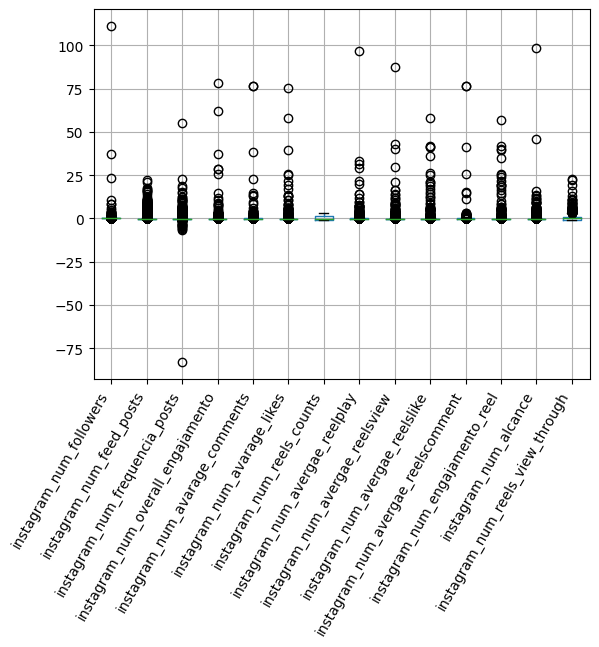

In [597]:
# Verifying outliers throught boxplot

prepi_scoring[continuos_variables].apply(scale).boxplot()
plt.xticks(rotation=60, ha= 'right')
plt.show()

In [598]:
# Limiting countinuos_variables values to greater than 0

for i in continuos_variables:
  prepi_scoring = prepi_scoring.loc[prepi_scoring[i] >= 0]

In [599]:
####### [DEBUG] Verifying null values in date columns

for i in prepi_scoring:
  nan_count = prepi_scoring[i].isnull().sum()
  print(f"{i}: {nan_count}")
  print('--------')

id: 0
--------
lead_hr_cadastro: 212
--------
lead_num_semana_cadastro: 220
--------
lead_fluxo: 148
--------
lead_tamanho_negocio: 207
--------
lead_utm_source: 750
--------
lead_utm_medium: 3112
--------
lead_lp_version: 207
--------
lead_referrer: 207
--------
lead_city: 0
--------
lead_region: 267
--------
lead_flag_became_client: 0
--------
lead_flag_became_user: 0
--------
instagram_num_followers: 0
--------
instagram_num_feed_posts: 0
--------
instagram_num_frequencia_posts: 0
--------
instagram_flag_postou_recente: 0
--------
instagram_flag_postou_muito_recente: 0
--------
instagram_num_overall_engajamento: 0
--------
instagram_num_avarage_comments: 0
--------
instagram_num_avarage_likes: 0
--------
instagram_num_reels_counts: 0
--------
instagram_num_avergae_reelplay: 0
--------
instagram_num_avergae_reelsview: 0
--------
instagram_num_avergae_reelslike: 0
--------
instagram_num_avergae_reelscomment: 0
--------
instagram_num_engajamento_reel: 0
--------
instagram_num_alcance: 

In [600]:
prepi_scoring[continuos_variables].describe(percentiles= [0.01, 0.1, 0.5, 0.75, 0.90, 0.99, 0.999])

,instagram_num_followers,instagram_num_feed_posts,instagram_num_frequencia_posts,instagram_num_overall_engajamento,instagram_num_avarage_comments,instagram_num_avarage_likes,instagram_num_reels_counts,instagram_num_avergae_reelplay,instagram_num_avergae_reelsview,instagram_num_avergae_reelslike,instagram_num_avergae_reelscomment,instagram_num_engajamento_reel,instagram_num_alcance,instagram_num_reels_view_through
count,1.393400e+04,13934.000000,13934.000000,13934.000000,13934.000000,13934.000000,13934.000000,1.393400e+04,1.393400e+04,13934.000000,13934.000000,13934.000000,13934.000000,13934.000000
mean,1.140206e+04,304.469212,66.855966,10.587042,4.531103,51.868837,5.457227,1.693905e+03,7.938788e+02,63.046526,3.840794,66.887320,1.133355,0.279027
std,4.899399e+05,785.563926,756.539519,220.479450,116.119332,990.374114,5.317225,3.114054e+04,1.425940e+04,941.939511,103.630149,990.817124,9.814196,0.252380
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
1%,2.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
10%,3.700000e+01,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.665000e+02,62.000000,0.336158,0.192145,0.250000,6.041667,4.000000,2.098333e+02,7.558333e+01,7.500000,0.100000,8.000000,0.180611,0.333453
75%,1.952000e+03,250.000000,1.526711,1.272695,1.000000,15.083333,12.000000,8.097803e+02,3.132292e+02,26.000000,1.400000,27.750000,0.736842,0.439676
90%,6.245500e+03,760.700000,10.672051,10.333333,3.166667,36.000000,12.000000,1.875050e+03,8.318233e+02,61.500000,4.222222,66.166667,2.102583,0.523506
99%,4.184074e+04,3825.840000,1507.004975,85.113333,40.213000,355.141667,12.000000,9.994885e+03,4.817293e+03,419.317500,25.000000,456.320000,13.716159,0.813772


In [601]:
# Limiting continuos variables to 99% column of the dataset

for i in continuos_variables:
  prepi_scoring = prepi_scoring.loc[prepi_scoring[i] < prepi_scoring[i].quantile(0.99)]


In [602]:
####### [DEBUG] Verifying null values in date columns

for i in prepi_scoring:
  nan_count = prepi_scoring[i].isnull().sum()
  print(f"{i}: {nan_count}")
  print('--------')

id: 0
--------
lead_hr_cadastro: 151
--------
lead_num_semana_cadastro: 155
--------
lead_fluxo: 109
--------
lead_tamanho_negocio: 144
--------
lead_utm_source: 429
--------
lead_utm_medium: 2255
--------
lead_lp_version: 144
--------
lead_referrer: 144
--------
lead_city: 0
--------
lead_region: 178
--------
lead_flag_became_client: 0
--------
lead_flag_became_user: 0
--------
instagram_num_followers: 0
--------
instagram_num_feed_posts: 0
--------
instagram_num_frequencia_posts: 0
--------
instagram_flag_postou_recente: 0
--------
instagram_flag_postou_muito_recente: 0
--------
instagram_num_overall_engajamento: 0
--------
instagram_num_avarage_comments: 0
--------
instagram_num_avarage_likes: 0
--------
instagram_num_reels_counts: 0
--------
instagram_num_avergae_reelplay: 0
--------
instagram_num_avergae_reelsview: 0
--------
instagram_num_avergae_reelslike: 0
--------
instagram_num_avergae_reelscomment: 0
--------
instagram_num_engajamento_reel: 0
--------
instagram_num_alcance: 

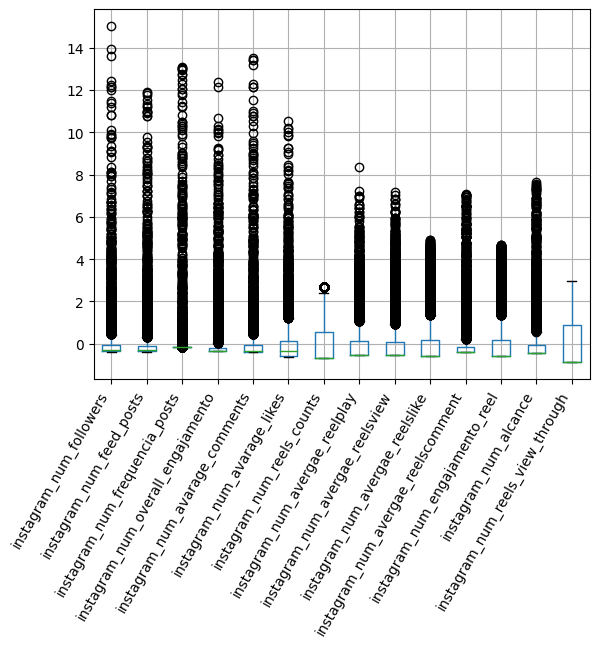

In [603]:
prepi_scoring[continuos_variables].apply(scale).boxplot()
plt.xticks(rotation=60, ha= 'right')
plt.show()

<ipython-input-604-d523ccf538d6>:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




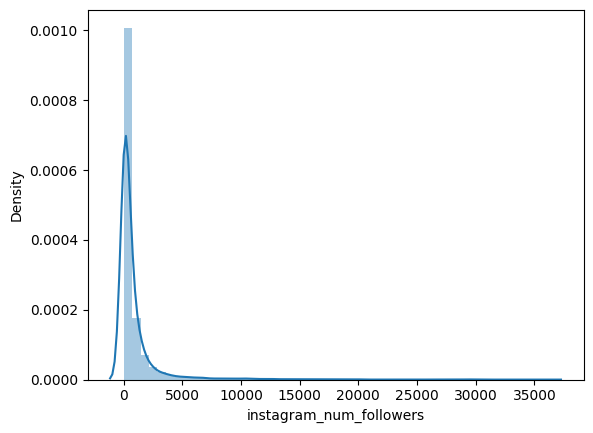

<ipython-input-604-d523ccf538d6>:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




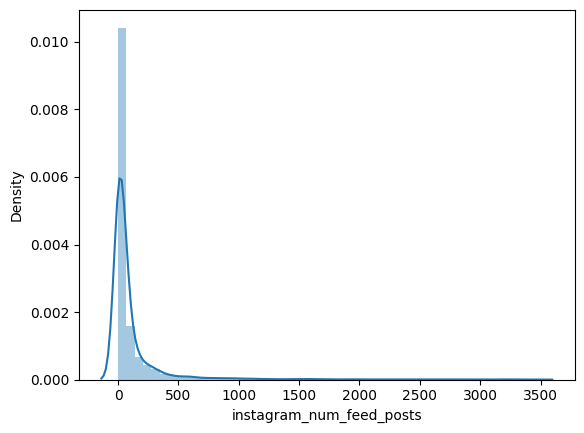

<ipython-input-604-d523ccf538d6>:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




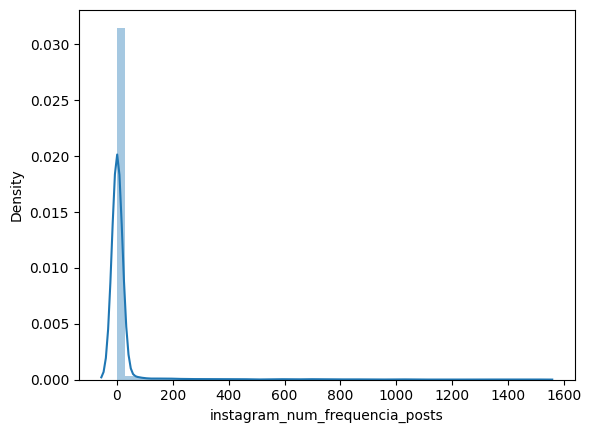

<ipython-input-604-d523ccf538d6>:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




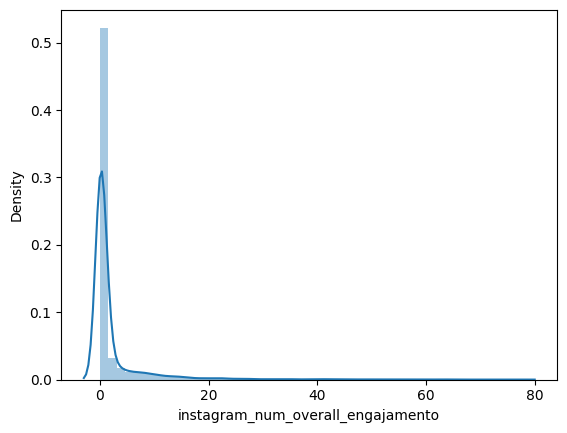

<ipython-input-604-d523ccf538d6>:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




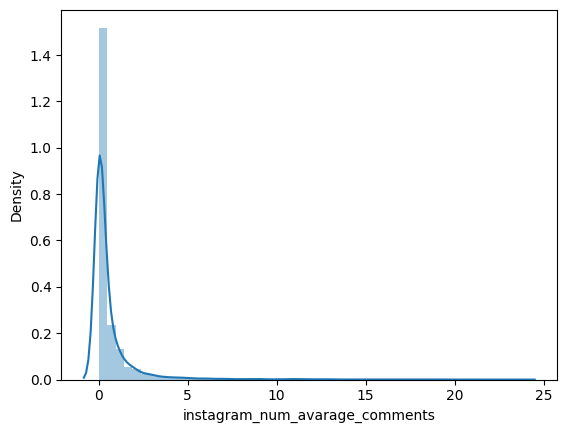

<ipython-input-604-d523ccf538d6>:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




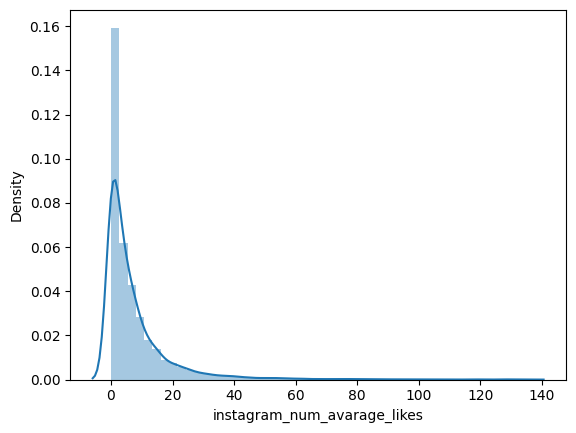

<ipython-input-604-d523ccf538d6>:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




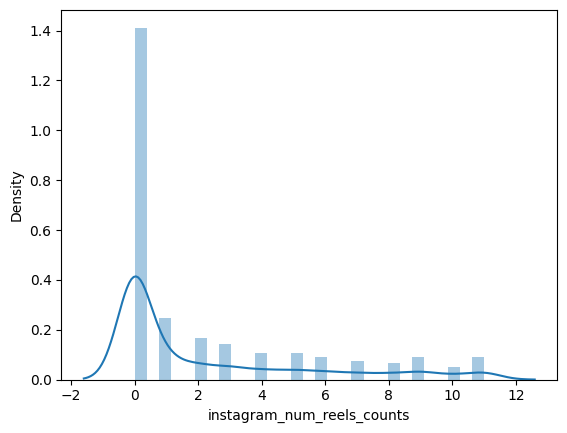

<ipython-input-604-d523ccf538d6>:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




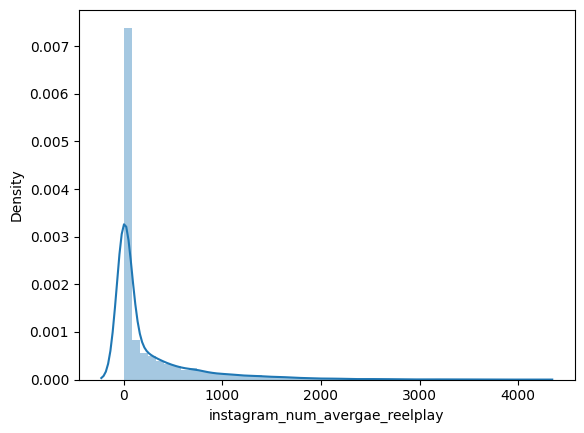

<ipython-input-604-d523ccf538d6>:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




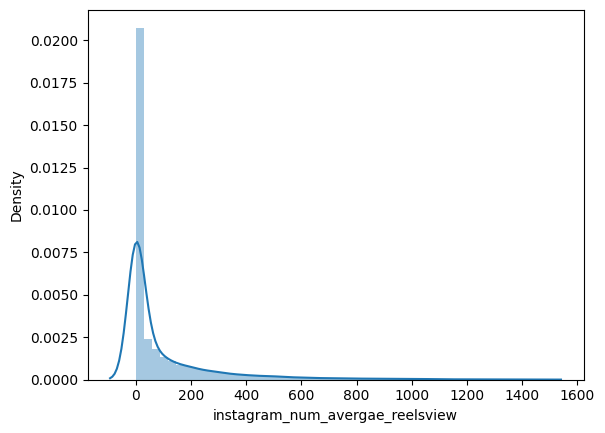

<ipython-input-604-d523ccf538d6>:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




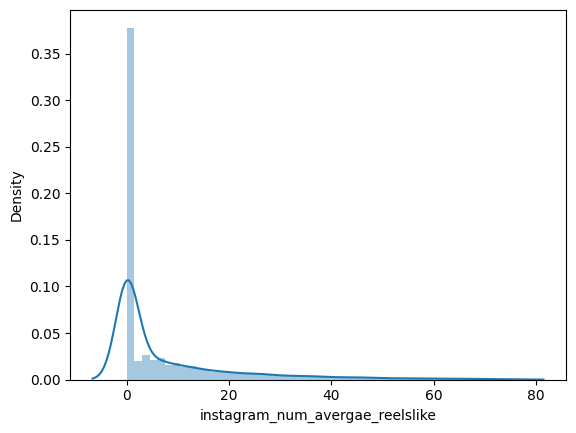

<ipython-input-604-d523ccf538d6>:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




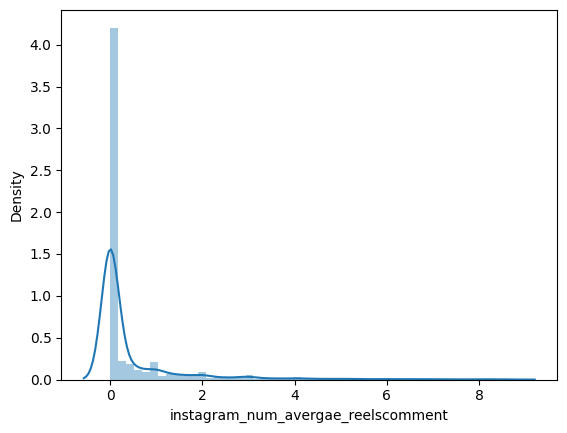

<ipython-input-604-d523ccf538d6>:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




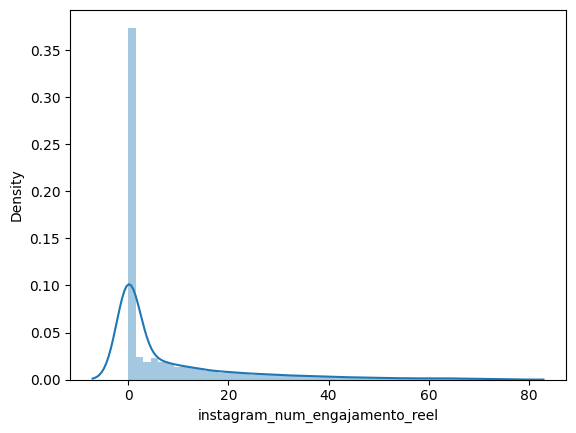

<ipython-input-604-d523ccf538d6>:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




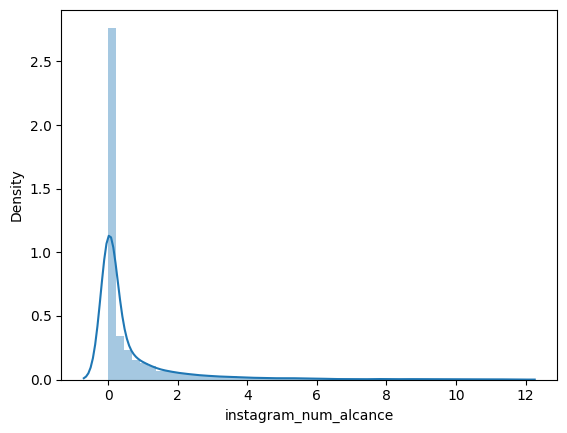

<ipython-input-604-d523ccf538d6>:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




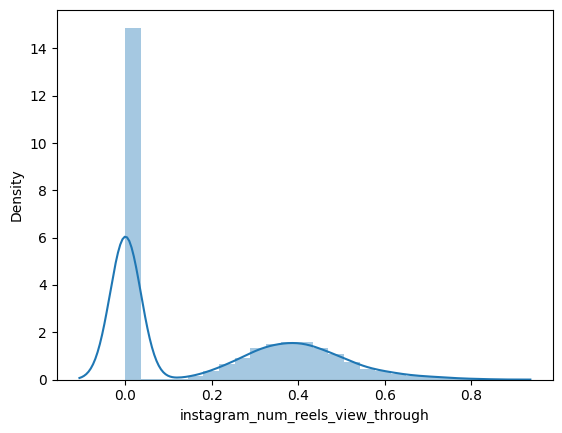

In [604]:
# Verifying data distribution of each one of the continuos numeric variables

for i in continuos_variables:
  x = prepi_scoring[i]
  ax = sns.distplot(x)
  plt.show()

#### Normalizing values

In [605]:
# Normalizing numeric continuous variables

#Importing library
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

prepi_scoring.reset_index()
prepi_scoring[continuos_variables] = scaler.fit_transform(prepi_scoring[continuos_variables])

print('Normalized Dataset')
display(prepi_scoring.sample(20))

print('\nDataset_stats: ')
display(prepi_scoring[continuos_variables].describe())

Normalized Dataset


,id,lead_hr_cadastro,lead_num_semana_cadastro,lead_fluxo,lead_tamanho_negocio,lead_utm_source,lead_utm_medium,lead_lp_version,lead_referrer,lead_city,...,instagram_flag_is_new,instagram_flag_is_bussiness,instagram_num_shoppable_post_count,instagram_category_bussiness,user_status,lead_num_idade,user_p1,user_p2,user_p3,user_p4
2363,2363,07:12,26.0,td,nenhum pedido (estou iniciando),facebook-td,placement,td1-best-landing,direct,cuiabá,...,0.0,1.0,51.0,baby & children's clothing shop,trial_churned,30.0,NaN,NaN,NaN,NaN
10626,10626,20:10,6.0,td,nenhum pedido (estou iniciando),facebook-td,instagram_reels,fb-td,instagram.com,salvador,...,0.0,1.0,0.0,entrepreneur,NaN,NaN,NaN,NaN,NaN,NaN
22954,22954,21:39:43,36.0,td,nenhum pedido (estou iniciando),facebook-td,facebook_right_column,fb-td,direct,outros,...,0.0,0.0,0.0,women's clothes shop,NaN,NaN,NaN,NaN,NaN,NaN
31025,31025,20:11:11,5.0,td,nenhum pedido (estou iniciando),facebook-td,instagram_reels,fb-td,instagram.com,outros,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3514,3514,08:10,34.0,td,nenhum pedido (estou iniciando),facebook-td,placement,fb-td,instagram.com,outros,...,0.0,0.0,NaN,entrepreneur,trial_churned,26.0,NaN,NaN,NaN,NaN
9656,9656,13:52,52.0,td,nenhum pedido (estou iniciando),facebook-td,facebook_right_column,fb-td,direct,campo grande,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25281,25281,18:20:25,50.0,td,nenhum pedido (estou iniciando),facebook-td,facebook_mobile_feed,fb-td,l.facebook.com,são paulo,...,0.0,0.0,NaN,entrepreneur,NaN,NaN,NaN,NaN,NaN,NaN
18653,18653,13:18:14,27.0,td,entre 5-15 pedidos,facebook-td,instagram_feed,fb-td,direct,outros,...,0.0,1.0,0.0,personal goods & general merchandise stores,churned,44.0,comecei agora minha loja,até 3 meses,😍 muito feliz (o),a loja não fatura suficiente ainda
1255,1255,22:05,20.0,td,nenhum pedido (estou iniciando),facebook-td,instagram_feed,vira-o-jogo,direct,são paulo,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18782,18782,11:29:45,27.0,td,nenhum pedido (estou iniciando),undefined,undefined,undefined,undefined,undefined,...,1.0,1.0,0.0,personal goods & general merchandise stores,churned,43.0,NaN,NaN,NaN,NaN



Dataset_stats: 


,instagram_num_followers,instagram_num_feed_posts,instagram_num_frequencia_posts,instagram_num_overall_engajamento,instagram_num_avarage_comments,instagram_num_avarage_likes,instagram_num_reels_counts,instagram_num_avergae_reelplay,instagram_num_avergae_reelsview,instagram_num_avergae_reelslike,instagram_num_avergae_reelscomment,instagram_num_engajamento_reel,instagram_num_alcance,instagram_num_reels_view_through
count,8503.000000,8503.000000,8503.000000,8503.000000,8503.000000,8503.000000,8503.000000,8503.000000,8503.000000,8503.000000,8503.000000,8503.000000,8503.000000,8503.000000
mean,0.025553,0.031242,0.012898,0.027900,0.026749,0.056203,0.201437,0.059779,0.066342,0.105406,0.054457,0.110150,0.055228,0.224191
std,0.064824,0.081466,0.075367,0.078490,0.071957,0.089553,0.295574,0.112467,0.130181,0.182282,0.133916,0.189962,0.123549,0.260901
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.001828,0.001446,0.000002,0.000120,0.000000,0.003096,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.006397,0.006940,0.000112,0.002449,0.003521,0.027245,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.022652,0.023424,0.000659,0.012288,0.023474,0.068235,0.363636,0.072270,0.074459,0.141806,0.034737,0.146768,0.050473,0.459842
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [606]:
####### [DEBUG] Verifying null values in date columns

for i in prepi_scoring:
  nan_count = prepi_scoring[i].isnull().sum()
  print(f"{i}: {nan_count}")
  print('--------')

id: 0
--------
lead_hr_cadastro: 151
--------
lead_num_semana_cadastro: 155
--------
lead_fluxo: 109
--------
lead_tamanho_negocio: 144
--------
lead_utm_source: 429
--------
lead_utm_medium: 2255
--------
lead_lp_version: 144
--------
lead_referrer: 144
--------
lead_city: 0
--------
lead_region: 178
--------
lead_flag_became_client: 0
--------
lead_flag_became_user: 0
--------
instagram_num_followers: 0
--------
instagram_num_feed_posts: 0
--------
instagram_num_frequencia_posts: 0
--------
instagram_flag_postou_recente: 0
--------
instagram_flag_postou_muito_recente: 0
--------
instagram_num_overall_engajamento: 0
--------
instagram_num_avarage_comments: 0
--------
instagram_num_avarage_likes: 0
--------
instagram_num_reels_counts: 0
--------
instagram_num_avergae_reelplay: 0
--------
instagram_num_avergae_reelsview: 0
--------
instagram_num_avergae_reelslike: 0
--------
instagram_num_avergae_reelscomment: 0
--------
instagram_num_engajamento_reel: 0
--------
instagram_num_alcance: 

## Value counts to encoding

### lead_hr_cadastro

In [607]:
# Exploring the lead_hr_cadastro format
prepi_scoring['lead_hr_cadastro'].sample(20)

18752     1:51:09
29621    13:36:02
32081    17:21:20
2256        17:12
195         09:12
28601    21:27:09
9978        07:10
32201    16:53:24
25010     7:47:56
20459    16:00:30
9633        20:49
19334    14:46:29
30389     7:25:37
1689        21:07
29867    12:52:12
1471        20:01
23940     6:56:34
22675    18:11:53
25791     8:17:01
31967     9:44:39
Name: lead_hr_cadastro, dtype: object

In [608]:
prepi_scoring['lead_hr_cadastro'].value_counts().sort_values(ascending=False)

22:14       8
22:27       7
14:06       7
22:06       6
14:45       6
           ..
8:07:19     1
8:22:16     1
0:28:59     1
14:22:51    1
12:34:54    1
Name: lead_hr_cadastro, Length: 7171, dtype: int64

In [609]:
# Function to split the hour on the ':' and convert to int
# Creating a new column to store the new data
prepi_scoring['lead_hr_cadastro_ajustado'] = prepi_scoring['lead_hr_cadastro'].apply(lambda x: int(str(x).split(':')[0]) if not pd.isna(x) else np.nan)


In [610]:
prepi_scoring['lead_hr_cadastro_ajustado'].mean()

13.577346743295019

In [611]:
# Function to fill the null values with the mean value
prepi_scoring['lead_hr_cadastro_ajustado'] = prepi_scoring['lead_hr_cadastro_ajustado'].fillna(prepi_scoring['lead_hr_cadastro_ajustado'].mean())

In [612]:
# Exploring the new data
prepi_scoring['lead_hr_cadastro_ajustado'].value_counts().sort_values()

4.000000      54
3.000000      70
5.000000      81
2.000000     117
13.577347    151
6.000000     160
1.000000     165
23.000000    267
0.000000     286
7.000000     331
8.000000     400
22.000000    418
10.000000    436
17.000000    437
15.000000    439
19.000000    440
16.000000    443
11.000000    448
12.000000    455
9.000000     457
18.000000    464
21.000000    491
13.000000    492
20.000000    493
14.000000    508
Name: lead_hr_cadastro_ajustado, dtype: int64

In [613]:
# Counting null values in the feature
prepi_scoring['lead_hr_cadastro_ajustado'].isnull().value_counts()

False    8503
Name: lead_hr_cadastro_ajustado, dtype: int64

In [614]:
prepi_scoring['lead_hr_cadastro_ajustado'] = prepi_scoring['lead_hr_cadastro_ajustado'].map(lambda x: int(x))

In [615]:
prepi_scoring['lead_hr_cadastro_ajustado'].value_counts()

13    643
14    508
20    493
21    491
18    464
9     457
12    455
11    448
16    443
19    440
15    439
17    437
10    436
22    418
8     400
7     331
0     286
23    267
1     165
6     160
2     117
5      81
3      70
4      54
Name: lead_hr_cadastro_ajustado, dtype: int64

In [616]:
# Reducing the number of categories

def hour_categories(hour):
  if (hour >= 4) and (hour < 12):
    return 'manha'
  if (hour >= 12) and (hour < 18):
    return 'tarde'
  if (hour >= 18) or (hour < 4):
    return 'noite'
  else:
    return hour


In [617]:
prepi_scoring['lead_hr_cadastro_ajustado'] = prepi_scoring['lead_hr_cadastro_ajustado'].map(hour_categories)

In [618]:
prepi_scoring['lead_hr_cadastro_ajustado'].value_counts()

noite    3211
tarde    2925
manha    2367
Name: lead_hr_cadastro_ajustado, dtype: int64

###lead_fluxo

In [619]:
# Exploring data
prepi_scoring['lead_fluxo'].value_counts()

td     5514
plg    2880
Name: lead_fluxo, dtype: int64

In [620]:
# Verifying null values
prepi_scoring['lead_fluxo'].isnull().value_counts()

False    8394
True      109
Name: lead_fluxo, dtype: int64

In [621]:
# Exploring the relation between the null values (lead_fluxo) and the other features
lead_fluxo_null = prepi_scoring[prepi_scoring['lead_fluxo'].isnull()]

for i in lead_fluxo_null:
  counts = lead_fluxo_null[i].value_counts()
  counts = counts.to_frame()
  counts_df = counts.reset_index().rename(columns={'index': 'value', i: 'count'})
  print (i)
  print(counts_df)
  print('--------------------------')

'''
Não é interessante eliminar as linhas com valores nulos na coluna 'lead_fluxo',
pois nestas existem muitos leads que viraram clientes('lead_flag_became_client').
Será incluído uma categoria de "informação desconhecida".
'''

id
     value  count
0    16796      1
1    27261      1
2    27884      1
3    27483      1
4    27365      1
..     ...    ...
104  21924      1
105  21923      1
106  21911      1
107  21695      1
108  31138      1

[109 rows x 2 columns]
--------------------------
lead_hr_cadastro
Empty DataFrame
Columns: [value, count]
Index: []
--------------------------
lead_num_semana_cadastro
Empty DataFrame
Columns: [value, count]
Index: []
--------------------------
lead_fluxo
Empty DataFrame
Columns: [value, count]
Index: []
--------------------------
lead_tamanho_negocio
Empty DataFrame
Columns: [value, count]
Index: []
--------------------------
lead_utm_source
Empty DataFrame
Columns: [value, count]
Index: []
--------------------------
lead_utm_medium
Empty DataFrame
Columns: [value, count]
Index: []
--------------------------
lead_lp_version
Empty DataFrame
Columns: [value, count]
Index: []
--------------------------
lead_referrer
Empty DataFrame
Columns: [value, count]
Index: []
-----

'\nNão é interessante eliminar as linhas com valores nulos na coluna \'lead_fluxo\',\npois nestas existem muitos leads que viraram clientes(\'lead_flag_became_client\').\nSerá incluído uma categoria de "informação desconhecida".\n'

In [622]:
# Adjusting the null values
# Filling the null values with "informação desconhecida"
prepi_scoring['lead_fluxo_ajustado'] = prepi_scoring['lead_fluxo'].fillna('informação desconhecida')

In [623]:
# Verifying data
prepi_scoring['lead_fluxo_ajustado'].value_counts()

td                         5514
plg                        2880
informação desconhecida     109
Name: lead_fluxo_ajustado, dtype: int64

### lead_tamanho_negocio

In [624]:
# Exploring data
prepi_scoring['lead_tamanho_negocio'].value_counts()

nenhum pedido (estou iniciando)    4973
até 5 pedidos                      1390
entre 5-15 pedidos                 1072
mais de 15 pedidos                  917
hidden question                       7
Name: lead_tamanho_negocio, dtype: int64

In [625]:
# Verifying null values
prepi_scoring['lead_tamanho_negocio'].isnull().value_counts()

False    8359
True      144
Name: lead_tamanho_negocio, dtype: int64

In [626]:
# Adjusting the null values
# Filling null values with 'HIDDEN QUESTION':
prepi_scoring['lead_tamanho_negocio_ajustado'] = prepi_scoring['lead_tamanho_negocio']
prepi_scoring['lead_tamanho_negocio_ajustado'] = prepi_scoring['lead_tamanho_negocio'].fillna('hidden question')

In [627]:
prepi_scoring[prepi_scoring['lead_tamanho_negocio_ajustado'].isnull()]

,id,lead_hr_cadastro,lead_num_semana_cadastro,lead_fluxo,lead_tamanho_negocio,lead_utm_source,lead_utm_medium,lead_lp_version,lead_referrer,lead_city,...,instagram_category_bussiness,user_status,lead_num_idade,user_p1,user_p2,user_p3,user_p4,lead_hr_cadastro_ajustado,lead_fluxo_ajustado,lead_tamanho_negocio_ajustado


In [628]:
prepi_scoring['lead_tamanho_negocio_ajustado'].value_counts()

nenhum pedido (estou iniciando)    4973
até 5 pedidos                      1390
entre 5-15 pedidos                 1072
mais de 15 pedidos                  917
hidden question                     151
Name: lead_tamanho_negocio_ajustado, dtype: int64

### lead_utm_medium

In [629]:
prepi_scoring['lead_utm_medium'].value_counts()

instagram_feed             2247
undefined                  1590
instagram_reels            1082
instagram_stories           423
facebook_mobile_feed        270
placement                   249
instagram_explore           187
facebook_right_column        68
others                       48
facebook_stories             26
whatsapp                     24
trafeg do site                9
facebook_desktop_feed         9
eventopresencial              5
descricao_video               4
an                            2
facebook_marketplace          2
facebook_instream_video       1
social                        1
qrcodeslide                   1
Name: lead_utm_medium, dtype: int64

In [630]:
# Verifying null values
prepi_scoring['lead_utm_medium'].isnull().value_counts()

False    6248
True     2255
Name: lead_utm_medium, dtype: int64

In [631]:
# Adjusting the null values
# Filling null values with 'Others':
prepi_scoring['lead_utm_medium_ajustado'] = prepi_scoring['lead_utm_medium'].fillna('others')

In [632]:
prepi_scoring['lead_utm_medium_ajustado'].value_counts()

others                     2303
instagram_feed             2247
undefined                  1590
instagram_reels            1082
instagram_stories           423
facebook_mobile_feed        270
placement                   249
instagram_explore           187
facebook_right_column        68
facebook_stories             26
whatsapp                     24
trafeg do site                9
facebook_desktop_feed         9
eventopresencial              5
descricao_video               4
an                            2
facebook_marketplace          2
facebook_instream_video       1
social                        1
qrcodeslide                   1
Name: lead_utm_medium_ajustado, dtype: int64

In [633]:
# Removing empty spaces from after and before of the strings

def remove_empty_spaces(content):
  return content.strip().lower()

In [634]:
prepi_scoring['lead_utm_medium_ajustado'] = prepi_scoring['lead_utm_medium_ajustado'].map(remove_empty_spaces)

In [635]:
# Adjusting string content

def encoding_utm_medium(content):
  if 'placement' in content:
    return 'others'
  # if content == '{}':
  #   return 'others'
  # if content == '{{placement}}':
  #   return 'others'
  if content == 'an':
    return 'others'
  if content == '[td c] [cbo] [interesses específicos] [vídeo influencer]':
    return 'others'
  if content == 'polocaruaru':
    return 'others'
  # if content == 'placement':
  #   return 'others'
  if content == 'raquelsantos':
    return 'others'
  if content == ',':
    return 'others'
  if content == 'recuperacao':
    return 'others'
  if content == 'undefined':
    return 'others'
  if content == 'instagram_feed,instagram_feed':
    return 'instagram_feed'
  else:
    return content

In [636]:
prepi_scoring['lead_utm_medium_ajustado']= prepi_scoring['lead_utm_medium_ajustado'].map(encoding_utm_medium)

In [637]:
prepi_scoring['lead_utm_medium_ajustado'].value_counts()

others                     4144
instagram_feed             2247
instagram_reels            1082
instagram_stories           423
facebook_mobile_feed        270
instagram_explore           187
facebook_right_column        68
facebook_stories             26
whatsapp                     24
trafeg do site                9
facebook_desktop_feed         9
eventopresencial              5
descricao_video               4
facebook_marketplace          2
social                        1
facebook_instream_video       1
qrcodeslide                   1
Name: lead_utm_medium_ajustado, dtype: int64

### lead_lp_version

In [638]:
# Exploring data
prepi_scoring['lead_lp_version'].value_counts()

fb-td               5925
inst-bio             653
fb-td-word           574
vira-o-jogo          311
organic              237
new-no-price         206
google               205
td1-best-landing     104
the-best-td2          93
undefined             33
meteorico-baby         7
la20                   4
oferta                 2
live                   2
influencer-maju        2
influencer             1
Name: lead_lp_version, dtype: int64

In [639]:
# Verifying null values
prepi_scoring['lead_lp_version'].isnull().value_counts()

False    8359
True      144
Name: lead_lp_version, dtype: int64

In [640]:
prepi_scoring[prepi_scoring['lead_lp_version'].isnull()]

,id,lead_hr_cadastro,lead_num_semana_cadastro,lead_fluxo,lead_tamanho_negocio,lead_utm_source,lead_utm_medium,lead_lp_version,lead_referrer,lead_city,...,user_status,lead_num_idade,user_p1,user_p2,user_p3,user_p4,lead_hr_cadastro_ajustado,lead_fluxo_ajustado,lead_tamanho_negocio_ajustado,lead_utm_medium_ajustado
3062,3062,08:51,NaN,td,NaN,NaN,NaN,NaN,NaN,outros,...,churned,25.0,comecei agora minha loja,até 3 meses,😰 desesperada (o),a loja não fatura suficiente ainda,manha,td,hidden question,others
3109,3109,09:12,NaN,td,NaN,NaN,NaN,NaN,NaN,outros,...,active,23.0,NaN,NaN,NaN,NaN,manha,td,hidden question,others
8659,8659,11:48,NaN,td,NaN,NaN,NaN,NaN,NaN,outros,...,user,NaN,NaN,NaN,NaN,NaN,manha,td,hidden question,others
9723,9723,09:08,NaN,td,NaN,NaN,NaN,NaN,NaN,outros,...,deleted,30.0,NaN,NaN,NaN,NaN,manha,td,hidden question,others
10640,10640,09:07,NaN,td,NaN,NaN,NaN,NaN,NaN,outros,...,user,NaN,NaN,NaN,NaN,NaN,manha,td,hidden question,others
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30816,30816,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,outros,...,user,NaN,comecei agora minha loja,até 3 meses,😀 animada (o),minha renda extra vem da loja,tarde,informação desconhecida,hidden question,others
30817,30817,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,outros,...,user,NaN,comecei agora minha loja,até 3 meses,😀 animada (o),minha renda extra vem da loja,tarde,informação desconhecida,hidden question,others
30880,30880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,outros,...,user,NaN,comecei agora minha loja,até 3 meses,😰 desesperada (o),a loja não fatura suficiente ainda,tarde,informação desconhecida,hidden question,others
31008,31008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,outros,...,active,40.0,comecei agora minha loja,até 3 meses,😕 desmotivada (o),a loja não fatura suficiente ainda,tarde,informação desconhecida,hidden question,others


In [641]:
# Adjusting the null values
# Filling the null values with "others"
prepi_scoring['lead_lp_version_ajustado'] = prepi_scoring['lead_lp_version'].fillna('other')

In [642]:
# Reducing the number of categories

def red_categories_lp_version(content):
  if 'undefined' in content.lower():
    return 'other'
  if 'influencer-maju' in content.lower():
    return 'other'
  if 'oferta' in content.lower():
    return 'other'
  if 'la20' in content.lower():
    return 'other'
  if 'meteorico-baby' in content.lower():
    return 'other'
  if 'influencer' in content.lower():
    return 'other'
  if 'live' in content.lower():
    return 'other'
  else:
    return content




In [643]:
prepi_scoring['lead_lp_version_ajustado'] = prepi_scoring['lead_lp_version_ajustado'].map(red_categories_lp_version)

In [644]:
# Verifying data
prepi_scoring['lead_lp_version_ajustado'].value_counts()

fb-td               5925
inst-bio             653
fb-td-word           574
vira-o-jogo          311
organic              237
new-no-price         206
google               205
other                195
td1-best-landing     104
the-best-td2          93
Name: lead_lp_version_ajustado, dtype: int64

### lead_referrer

In [645]:
# Exploring data
counts_referrer = prepi_scoring['lead_referrer'].value_counts()
counts_referrer = counts_referrer.reset_index().rename(columns={'index': 'value', 'lead_referrer': 'count'})
counts_referrer[counts_referrer['count']>2]

,value,count
0,direct,3438
1,instagram.com,2155
2,cadastro.prepi.com.br,1279
3,l.instagram.com,656
4,l.facebook.com,278
5,www.google.com,216
6,m.facebook.com,204
7,undefined,33
8,www.google.com.br,31
9,www.bing.com,14


In [646]:
# Verifying null values
prepi_scoring['lead_referrer'].isnull().value_counts()

False    8359
True      144
Name: lead_referrer, dtype: int64

In [647]:
# Adjusting the null values
# Filling the null values with "undefined"
prepi_scoring['lead_referrer_ajustado'] = prepi_scoring['lead_referrer'].fillna('undefined')

In [648]:
#Adjusting string content

def group_lead_referrer(content):
  if isinstance(content,str):
    if 'instagram' in content.lower():
      return 'instagram'
    if 'prepi' in content.lower():
      return 'prepi'
    if 'facebook' in content.lower():
      return 'facebook'
    if 'google' in content.lower():
      return 'google'
    if 'youtube' in content.lower():
      return 'youtube'
    if 'bing' in content.lower():
      return 'bing'
    if 'yahoo' in content.lower():
      return 'yahoo'
    if 'wl' in content.lower():
      return 'wl'
    if 'jumakeupstore' in content.lower():
      return 'jumakeupstore'
    if 'tiktok' in content.lower():
      return 'tiktok'
    if 'direct' in content.lower():
      return 'direct'
    else:
      return 'undefined'
  else:
    return content
    print(content)


In [649]:
prepi_scoring['lead_referrer_ajustado'] = prepi_scoring['lead_referrer_ajustado'].map(group_lead_referrer)

In [650]:
prepi_scoring['lead_referrer_ajustado'].value_counts()

direct           3438
instagram        2811
prepi            1301
facebook          496
google            247
undefined         181
bing               14
yahoo               7
youtube             4
wl                  3
jumakeupstore       1
Name: lead_referrer_ajustado, dtype: int64

In [651]:
# Reducing the number of categories

def red_categories_lead_referrer(content):
  if 'bing' in content:
    return 'other'
  if 'yahoo' in content:
    return 'other'
  if 'youtube' in content:
    return 'other'
  if 'tiktok' in content:
    return 'other'
  if 'wl' in content:
    return 'other'
  if 'jumakeupstore' in content:
    return 'other'
  else:
    return content

In [652]:
prepi_scoring['lead_referrer_ajustado'] = prepi_scoring['lead_referrer_ajustado'].map(red_categories_lead_referrer)

In [653]:
prepi_scoring['lead_referrer_ajustado'].value_counts()

direct       3438
instagram    2811
prepi        1301
facebook      496
google        247
undefined     181
other          29
Name: lead_referrer_ajustado, dtype: int64

### lead_region

In [654]:
# Explore data

prepi_scoring['lead_region'].value_counts()

undefined              3542
sao paulo              1326
minas gerais            456
rio de janeiro          454
rio grande do sul       237
pernambuco              234
bahia                   232
santa catarina          227
ceara                   222
parana                  221
goias                   143
para                    126
federal district        104
espirito santo           94
maranhao                 93
mato grosso              87
amazonas                 83
mato grosso do sul       66
paraíba                  60
piaui                    60
rio grande do norte      57
alagoas                  44
sergipe                  42
tocantins                27
rondonia                 25
amapa                    17
roraima                  15
são paulo                14
acre                      9
galicia                   1
aargau                    1
canelones                 1
luanda                    1
ontario                   1
istanbul                  1
england             

In [655]:
counts_region = prepi_scoring['lead_region'].value_counts()
counts_region = counts_region.reset_index().rename(columns={'index': 'value', 'lead_region': 'count'})
counts_region[counts_region['count']>2]

,value,count
0,undefined,3542
1,sao paulo,1326
2,minas gerais,456
3,rio de janeiro,454
4,rio grande do sul,237
5,pernambuco,234
6,bahia,232
7,santa catarina,227
8,ceara,222
9,parana,221


In [656]:
# Verifyng null values

prepi_scoring['lead_region'].isnull().value_counts()

False    8325
True      178
Name: lead_region, dtype: int64

In [657]:
# Adjusting the null values
# Filling the null values with "undefined"
prepi_scoring['lead_region_ajustado'] = prepi_scoring['lead_region'].fillna('undefined')

In [658]:
# Adjusting string content

def region_edit(content):
  return unidecode(content)
  if 'none' in content:
    return 'undefined'
  if 'sao paulooeste' in content:
    return 'sao paulo'
  else:
    return content


In [659]:
prepi_scoring['lead_region_ajustado'] = prepi_scoring['lead_region_ajustado'].map(region_edit)

In [660]:
# Reducing the number of categories

def red_categories_lead_region(content):
    centro_oeste = ['goias','mato grosso','mato grosso do sul','federal district']
    nordeste = ['alagoas','bahia', 'ceara', 'maranhao', 'paraiba', 'pernambuco', 'piaui', 'rio grande do norte', 'sergipe']
    norte = ['acre', 'amapa', 'amazonas', 'para', 'rondonia', 'roraima', 'tocantins']
    sudeste = ['espirito santo', 'minas gerais', 'rio de janeiro', 'sao paulo']
    sul = ['parana','rio grande do sul','santa catarina']
    region = [centro_oeste, nordeste, norte, sudeste, sul]
    for r,state_list in zip(['centro_oeste', 'nordeste', 'norte', 'sudeste', 'sul'],region):
      for s in state_list:
        if s in content.lower().strip():
          return r
    return 'other'


In [661]:
prepi_scoring['lead_region_ajustado'] = prepi_scoring['lead_region_ajustado'].map(red_categories_lead_region)

In [662]:
# Verifying data

prepi_scoring['lead_region_ajustado'].value_counts()

other           3728
sudeste         2344
nordeste        1044
norte            523
sul              464
centro_oeste     400
Name: lead_region_ajustado, dtype: int64

### lead_num_semana_cadastro

## Modeling - became client

In [663]:
# Exploring data
prepi_scoring['lead_num_semana_cadastro'].value_counts()

38.0    339
36.0    326
7.0     321
6.0     305
28.0    292
29.0    282
27.0    275
37.0    274
51.0    265
5.0     253
48.0    252
33.0    251
34.0    250
30.0    246
49.0    230
35.0    229
52.0    229
25.0    222
50.0    213
4.0     207
26.0    206
46.0    203
2.0     198
3.0     198
31.0    189
39.0    186
17.0    175
1.0     147
53.0    142
47.0    140
44.0    138
43.0    129
45.0    128
40.0     97
18.0     95
42.0     94
32.0     91
24.0     91
19.0     91
41.0     78
20.0     71
21.0     57
23.0     50
8.0      45
22.0     24
16.0      8
54.0      5
12.0      3
13.0      3
9.0       2
11.0      1
10.0      1
14.0      1
Name: lead_num_semana_cadastro, dtype: int64

In [664]:
# Verifying null values
prepi_scoring['lead_num_semana_cadastro'].isnull().value_counts()

False    8348
True      155
Name: lead_num_semana_cadastro, dtype: int64

In [665]:
# Adjusting the null values
# Filling the null values with 0
prepi_scoring['lead_num_semana_cadastro_ajustado'] = prepi_scoring['lead_num_semana_cadastro'].fillna('undefined')

In [666]:
# Reducing the number of categories

def red_categories_num_semana(semana):
  if (semana >=0 and semana < 14):
    return 'primeiro'
  if  (semana >=14 and semana < 28):
    return 'segundo'
  if  (semana >=28 and semana < 43):
    return 'terceiro'
  if  (semana >=43 and semana < 54):
    return 'quarto'
  else:
    return 'undefined'



In [667]:
prepi_scoring['lead_num_trimestre_ajustado'] = prepi_scoring['lead_num_semana_cadastro'].map(red_categories_num_semana)

In [668]:
prepi_scoring['lead_num_trimestre_ajustado'].value_counts()

terceiro     3224
quarto       2069
primeiro     1684
segundo      1366
undefined     160
Name: lead_num_trimestre_ajustado, dtype: int64

### Chosing features

In [669]:
prepi_scoring.columns

Index(['id', 'lead_hr_cadastro', 'lead_num_semana_cadastro', 'lead_fluxo',
       'lead_tamanho_negocio', 'lead_utm_source', 'lead_utm_medium',
       'lead_lp_version', 'lead_referrer', 'lead_city', 'lead_region',
       'lead_flag_became_client', 'lead_flag_became_user',
       'instagram_num_followers', 'instagram_num_feed_posts',
       'instagram_num_frequencia_posts', 'instagram_flag_postou_recente',
       'instagram_flag_postou_muito_recente',
       'instagram_num_overall_engajamento', 'instagram_num_avarage_comments',
       'instagram_num_avarage_likes', 'instagram_num_reels_counts',
       'instagram_num_avergae_reelplay', 'instagram_num_avergae_reelsview',
       'instagram_num_avergae_reelslike', 'instagram_num_avergae_reelscomment',
       'instagram_num_engajamento_reel', 'instagram_num_alcance',
       'instagram_num_reels_view_through', 'instagram_num_stories_count',
       'instagram_flag_has_hightlight', 'instagram_num_usertag_count',
       'instagram_flag_is_new',

#### Original features

In [670]:
# Selection of all discussed columns

modelling_dataset_client = prepi_scoring[['id',
                                          'lead_hr_cadastro_ajustado',
                                          'lead_fluxo_ajustado',
                                          'lead_tamanho_negocio_ajustado',
                                          'lead_utm_medium_ajustado',
                                          'lead_lp_version_ajustado',
                                          'lead_referrer_ajustado',
                                          'lead_region_ajustado',
                                          'lead_num_trimestre_ajustado',
                                          'lead_flag_became_client',
                                          'instagram_num_followers',
                                          'instagram_num_feed_posts',
                                          'instagram_num_frequencia_posts',
                                          'instagram_num_overall_engajamento',
                                          'instagram_num_avarage_comments',
                                          'instagram_num_avarage_likes',
                                          'instagram_num_reels_counts',
                                          'instagram_num_avergae_reelplay',
                                          'instagram_num_avergae_reelsview',
                                          'instagram_num_avergae_reelslike',
                                          'instagram_num_avergae_reelscomment',
                                          'instagram_num_engajamento_reel',
                                          'instagram_num_alcance',
                                          'instagram_num_reels_view_through'
                                           ]]
modelling_dataset_client = modelling_dataset_client.set_index('id')

### Get_dummies

In [671]:
modelling_dataset_client.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8503 entries, 3 to 32800
Data columns (total 23 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   lead_hr_cadastro_ajustado           8503 non-null   object 
 1   lead_fluxo_ajustado                 8503 non-null   object 
 2   lead_tamanho_negocio_ajustado       8503 non-null   object 
 3   lead_utm_medium_ajustado            8503 non-null   object 
 4   lead_lp_version_ajustado            8503 non-null   object 
 5   lead_referrer_ajustado              8503 non-null   object 
 6   lead_region_ajustado                8503 non-null   object 
 7   lead_num_trimestre_ajustado         8503 non-null   object 
 8   lead_flag_became_client             8503 non-null   int64  
 9   instagram_num_followers             8503 non-null   float64
 10  instagram_num_feed_posts            8503 non-null   float64
 11  instagram_num_frequencia_posts      8503 n

In [672]:
#Converting features to dummies

dummy_df = pd.get_dummies(modelling_dataset_client)
dummy_df

,lead_flag_became_client,instagram_num_followers,instagram_num_feed_posts,instagram_num_frequencia_posts,instagram_num_overall_engajamento,instagram_num_avarage_comments,instagram_num_avarage_likes,instagram_num_reels_counts,instagram_num_avergae_reelplay,instagram_num_avergae_reelsview,...,lead_region_ajustado_nordeste,lead_region_ajustado_norte,lead_region_ajustado_other,lead_region_ajustado_sudeste,lead_region_ajustado_sul,lead_num_trimestre_ajustado_primeiro,lead_num_trimestre_ajustado_quarto,lead_num_trimestre_ajustado_segundo,lead_num_trimestre_ajustado_terceiro,lead_num_trimestre_ajustado_undefined
id,,,,,,,,,,,,,,,,,,,,,
3,0,0.008834,0.040197,0.000032,0.116883,0.010563,0.065015,0.090909,0.023798,0.023484,...,1,0,0,0,0,0,0,0,1,0
6,0,0.086066,0.174667,0.000011,0.550866,0.102113,0.297214,0.090909,0.424235,0.669302,...,0,0,0,1,0,0,0,1,0,0
9,0,0.012600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1,0,0,0,0,0,0,1,0,0
10,0,0.014095,0.007230,0.000157,0.033550,0.003521,0.018576,0.181818,0.017727,0.008289,...,0,0,0,1,0,0,0,1,0,0
12,0,0.001412,0.007230,0.000018,0.220779,0.042254,0.118885,0.000000,0.000000,0.000000,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32715,0,0.004818,0.010989,0.000127,0.002986,0.000000,0.024768,0.545455,0.052210,0.071259,...,0,0,1,0,0,1,0,0,0,0
32723,1,0.009083,0.048583,0.000264,0.001901,0.000000,0.029721,0.636364,0.134913,0.119592,...,0,1,0,0,0,1,0,0,0,0
32724,1,0.003185,0.004338,0.000067,0.014342,0.031690,0.073065,0.636364,0.192014,0.171100,...,1,0,0,0,0,1,0,0,0,0


In [673]:
dummy_df.columns

Index(['lead_flag_became_client', 'instagram_num_followers',
       'instagram_num_feed_posts', 'instagram_num_frequencia_posts',
       'instagram_num_overall_engajamento', 'instagram_num_avarage_comments',
       'instagram_num_avarage_likes', 'instagram_num_reels_counts',
       'instagram_num_avergae_reelplay', 'instagram_num_avergae_reelsview',
       'instagram_num_avergae_reelslike', 'instagram_num_avergae_reelscomment',
       'instagram_num_engajamento_reel', 'instagram_num_alcance',
       'instagram_num_reels_view_through', 'lead_hr_cadastro_ajustado_manha',
       'lead_hr_cadastro_ajustado_noite', 'lead_hr_cadastro_ajustado_tarde',
       'lead_fluxo_ajustado_informação desconhecida',
       'lead_fluxo_ajustado_plg', 'lead_fluxo_ajustado_td',
       'lead_tamanho_negocio_ajustado_até 5 pedidos',
       'lead_tamanho_negocio_ajustado_entre 5-15 pedidos',
       'lead_tamanho_negocio_ajustado_hidden question',
       'lead_tamanho_negocio_ajustado_mais de 15 pedidos',
     

In [674]:
dummy_df.shape

(8503, 71)

In [675]:
# Exploring 'undefined' columns
for i in dummy_df.columns:
  if 'undefined' in i:
    print(i)

lead_referrer_ajustado_undefined
lead_num_trimestre_ajustado_undefined


In [676]:
# Exploring 'other' columns
for i in dummy_df.columns:
  if 'other' in i:
    print(i)

lead_utm_medium_ajustado_others
lead_lp_version_ajustado_other
lead_referrer_ajustado_other
lead_region_ajustado_other


In [677]:
# Dropping 'undefined' columns
dummy_df.drop(columns=['lead_referrer_ajustado_undefined','lead_num_trimestre_ajustado_undefined'],inplace=True)

In [678]:
dummy_df['lead_utm_medium_ajustado_others']

id
3        1
6        0
9        1
10       0
12       0
        ..
32715    1
32723    0
32724    1
32749    1
32800    1
Name: lead_utm_medium_ajustado_others, Length: 8503, dtype: uint8

In [679]:
# Dropping 'other' and 'others' columns
dummy_df.drop(columns=['lead_utm_medium_ajustado_others',
                       'lead_lp_version_ajustado_other',
                       'lead_referrer_ajustado_other',
                       'lead_region_ajustado_other'],
                       inplace=True)

### Train-Test Split

In [680]:
from sklearn.model_selection import train_test_split

In [681]:
# Selecting train-test data
X_features = dummy_df.drop(columns=['lead_flag_became_client'])

y_target = dummy_df['lead_flag_became_client']

In [682]:
X_train, X_test, y_train, y_test = train_test_split(X_features,y_target,test_size=0.2,random_state=7)

In [683]:
# Visualizing train_test datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (6802, 64)
X_test shape: (1701, 64)
y_train shape: (6802,)
y_test shape: (1701,)


In [684]:
X_train

,instagram_num_followers,instagram_num_feed_posts,instagram_num_frequencia_posts,instagram_num_overall_engajamento,instagram_num_avarage_comments,instagram_num_avarage_likes,instagram_num_reels_counts,instagram_num_avergae_reelplay,instagram_num_avergae_reelsview,instagram_num_avergae_reelslike,...,lead_referrer_ajustado_prepi,lead_region_ajustado_centro_oeste,lead_region_ajustado_nordeste,lead_region_ajustado_norte,lead_region_ajustado_sudeste,lead_region_ajustado_sul,lead_num_trimestre_ajustado_primeiro,lead_num_trimestre_ajustado_quarto,lead_num_trimestre_ajustado_segundo,lead_num_trimestre_ajustado_terceiro
id,,,,,,,,,,,,,,,,,,,,,
9223,0.008307,0.023135,0.000035,0.014762,0.126761,0.188854,0.363636,0.163611,0.222410,0.160535,...,0,0,0,0,1,0,0,1,0,0
9941,0.008169,0.014170,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,1,0,0,0,1,0,0,0
10354,0.003212,0.018219,0.466216,0.002911,0.000000,0.016099,0.000000,0.000000,0.000000,0.000000,...,0,0,0,1,0,0,1,0,0,0
18304,0.018276,0.036726,0.001521,0.130952,0.000000,0.074923,0.818182,0.385597,0.470530,0.853214,...,0,0,0,0,1,0,0,0,1,0
24617,0.154242,0.987854,0.002364,0.000324,0.017606,0.082972,0.818182,0.261184,0.322256,0.487551,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8660,0.042728,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0.008256,0.012433,0.000000,...,1,0,0,0,0,0,0,0,0,1
4580,0.002132,0.040486,0.000059,0.005229,0.021127,0.015480,0.000000,0.000000,0.000000,0.000000,...,0,0,0,1,0,0,0,0,0,1
22128,0.000055,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,1,0,0,0,0,0,0,1


In [685]:
X_test

,instagram_num_followers,instagram_num_feed_posts,instagram_num_frequencia_posts,instagram_num_overall_engajamento,instagram_num_avarage_comments,instagram_num_avarage_likes,instagram_num_reels_counts,instagram_num_avergae_reelplay,instagram_num_avergae_reelsview,instagram_num_avergae_reelslike,...,lead_referrer_ajustado_prepi,lead_region_ajustado_centro_oeste,lead_region_ajustado_nordeste,lead_region_ajustado_norte,lead_region_ajustado_sudeste,lead_region_ajustado_sul,lead_num_trimestre_ajustado_primeiro,lead_num_trimestre_ajustado_quarto,lead_num_trimestre_ajustado_segundo,lead_num_trimestre_ajustado_terceiro
id,,,,,,,,,,,,,,,,,,,,,
29056,0.048654,0.047715,0.000142,0.003393,0.172535,0.253870,1.000000,0.228443,0.380269,0.730921,...,0,0,0,1,0,0,0,1,0,0
26440,0.002381,0.006362,0.000257,0.009665,0.035211,0.033437,0.181818,0.011656,0.014505,0.013378,...,0,1,0,0,0,0,0,1,0,0
17939,0.000831,0.003181,0.001008,0.008264,0.000000,0.004728,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,1,0
25883,0.000138,0.000289,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1,0,0,0,0,0,0,1,0,0
8067,0.082826,0.045691,0.000054,0.000934,0.045775,0.125077,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8020,0.000969,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,1,0,0,1,0,0
31796,0.018553,0.009543,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1,0,0,0,0,0,1,0,0,0
23721,0.006812,0.002892,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,1


### Selecting model

In [686]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, roc_auc_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler, NearMiss, CondensedNearestNeighbour
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from statistics import mean


#### RF - Random Forest

In [687]:
# RF model

model_rf = RandomForestClassifier(bootstrap = False,
                                  max_depth = None,
                                  max_features = 'sqrt',
                                  n_estimators = 100,
                                  min_samples_split = 4)
model_rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=False, min_samples_split=4)

In [688]:
y_pred_train = model_rf.predict(X_train)
y_pred_test = model_rf.predict(X_test)

In [689]:
print('Acc Treino: ', accuracy_score(y_train,y_pred_train)*100)
print('Acc Teste: ', accuracy_score(y_test,y_pred_test)*100)

print('==============================================')

print('F1 Treino: ', f1_score(y_train,y_pred_train,average='weighted')*100)
print('F1 Teste: ', f1_score(y_test,y_pred_test,average='weighted')*100)

print('==============================================')

print('ROC_AUC Treino: ', roc_auc_score(y_train,y_pred_train)*100)
print('ROC_AUC Teste: ', roc_auc_score(y_test,y_pred_test)*100)

print('==============================================')

print('Confusion Matrix \n',confusion_matrix(y_test,y_pred_test))

print('==============================================')

print('Classification Report \n',classification_report(y_test, y_pred_test))
print('Precision: Percentage of correct positive predictions relative to total positive predictions')
print('Recall: Percentage of correct positive predictions relative to total actual positives ')
print('F1 Score: A weighted harmonic mean of precision and recall. The closer to 1, the better the model')

Acc Treino:  99.94119376653924
Acc Teste:  90.47619047619048
F1 Treino:  99.9411216449271
F1 Teste:  87.36238792418567
ROC_AUC Treino:  99.72260748959778
ROC_AUC Teste:  54.965753424657535
Confusion Matrix 
 [[1521   12]
 [ 150   18]]
Classification Report 
               precision    recall  f1-score   support

           0       0.91      0.99      0.95      1533
           1       0.60      0.11      0.18       168

    accuracy                           0.90      1701
   macro avg       0.76      0.55      0.57      1701
weighted avg       0.88      0.90      0.87      1701

Precision: Percentage of correct positive predictions relative to total positive predictions
Recall: Percentage of correct positive predictions relative to total actual positives 
F1 Score: A weighted harmonic mean of precision and recall. The closer to 1, the better the model


##### SMOTE - Rebalanced

In [690]:
# Proportion of data
p=0
n=0
for i in y_train:
  if i == 0:
    n = n+1
  else:
    p=p+1

print(f'y_train (No-ressample) \n \nPositivos (1): {p} ({(p*100/(p+n)):,.2f} %) \nNegativos (0): {n} ({(n*100/(p+n)):,.2f} %)')

y_train (No-ressample) 
 
Positivos (1): 721 (10.60 %) 
Negativos (0): 6081 (89.40 %)


In [691]:
# SMOTE - Rebalancing dataset

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train,y_train)

In [692]:
# Proportion of data
p=0
n=0
for i in y_train_res:
  if i == 0:
    n = n+1
  else:
    p=p+1

print(f'y_train (Ressampled) \n \nPositivos (1): {p} ({(p*100/(p+n)):,.2f} %) \nNegativos (0): {n} ({(n*100/(p+n)):,.2f} %)')

y_train (Ressampled) 
 
Positivos (1): 6081 (50.00 %) 
Negativos (0): 6081 (50.00 %)


In [693]:
# Training the model with SMOTE rebalanced columns
model_rf = RandomForestClassifier(bootstrap = False,
                                  max_depth = None,
                                  max_features = 'sqrt',
                                  n_estimators = 100,
                                  min_samples_split = 4)
model_rf.fit(X_train_res,y_train_res)

RandomForestClassifier(bootstrap=False, min_samples_split=4)

In [694]:
y_pred_train_res = model_rf.predict(X_train_res)
y_pred_test= model_rf.predict(X_test)

In [695]:
print('Acc Treino: ', accuracy_score(y_train_res,y_pred_train_res)*100)
print('Acc Teste: ', accuracy_score(y_test,y_pred_test)*100)

print('==============================================')

print('F1 Treino: ', f1_score(y_train_res,y_pred_train_res,average='weighted')*100)
print('F1 Teste: ', f1_score(y_test,y_pred_test,average='weighted')*100)

print('==============================================')

print('ROC AUC Treino: ', roc_auc_score(y_train_res,y_pred_train_res)*100)
print('ROC AUC Teste: ', roc_auc_score(y_test,y_pred_test)*100)

print('==============================================')

print('Confusion Matrix \n',confusion_matrix(y_test,y_pred_test))

print('==============================================')

print('Classification Report \n',classification_report(y_test, y_pred_test))
print('Precision: Percentage of correct positive predictions relative to total positive predictions')
print('Recall: Percentage of correct positive predictions relative to total actual positives ')
print('F1 Score: A weighted harmonic mean of precision and recall. The closer to 1, the better the model')

Acc Treino:  99.97533300444006
Acc Teste:  89.18283362727807
F1 Treino:  99.97533300293917
F1 Teste:  87.7826819542513
ROC AUC Treino:  99.97533300444006
ROC AUC Teste:  59.81327462491848
Confusion Matrix 
 [[1478   55]
 [ 129   39]]
Classification Report 
               precision    recall  f1-score   support

           0       0.92      0.96      0.94      1533
           1       0.41      0.23      0.30       168

    accuracy                           0.89      1701
   macro avg       0.67      0.60      0.62      1701
weighted avg       0.87      0.89      0.88      1701

Precision: Percentage of correct positive predictions relative to total positive predictions
Recall: Percentage of correct positive predictions relative to total actual positives 
F1 Score: A weighted harmonic mean of precision and recall. The closer to 1, the better the model


##### ADASYN - Rebalanced

In [696]:
# ADASYN - Rebalancing dataset

ada = ADASYN(random_state=42)
X_train_res, y_train_res = ada.fit_resample(X_train,y_train)

In [697]:
# Training the model with ADASYN rebalanced columns
model_rf = RandomForestClassifier()
model_rf.fit(X_train_res,y_train_res)

RandomForestClassifier()

In [698]:
y_pred_train_res = model_rf.predict(X_train_res)
y_pred_test= model_rf.predict(X_test)
y_pred_proba_test = model_rf.predict_proba(X_test)

In [699]:
print('Acc Treino: ', accuracy_score(y_train_res,y_pred_train_res)*100)
print('Acc Teste: ', accuracy_score(y_test,y_pred_test)*100)

print('==============================================')

print('F1 Treino: ', f1_score(y_train_res,y_pred_train_res,average='weighted')*100)
print('F1 Teste: ', f1_score(y_test,y_pred_test,average='weighted')*100)

print('==============================================')

print('ROC AUC Treino: ', roc_auc_score(y_train_res,y_pred_train_res)*100)
print('ROC AUC Teste: ', roc_auc_score(y_test,y_pred_test)*100)

print('==============================================')

print('Confusion Matrix \n',confusion_matrix(y_test,y_pred_test))

print('==============================================')

print('Classification Report \n',classification_report(y_test, y_pred_test))
print('Precision: Percentage of correct positive predictions relative to total positive predictions')
print('Recall: Percentage of correct positive predictions relative to total actual positives ')
print('F1 Score: A weighted harmonic mean of precision and recall. The closer to 1, the better the model')

Acc Treino:  99.98356344510191
Acc Teste:  88.59494415049971
F1 Treino:  99.98356344332569
F1 Teste:  87.68950268736319
ROC AUC Treino:  99.98355533629338
ROC AUC Teste:  61.34213959556425
Confusion Matrix 
 [[1461   72]
 [ 122   46]]
Classification Report 
               precision    recall  f1-score   support

           0       0.92      0.95      0.94      1533
           1       0.39      0.27      0.32       168

    accuracy                           0.89      1701
   macro avg       0.66      0.61      0.63      1701
weighted avg       0.87      0.89      0.88      1701

Precision: Percentage of correct positive predictions relative to total positive predictions
Recall: Percentage of correct positive predictions relative to total actual positives 
F1 Score: A weighted harmonic mean of precision and recall. The closer to 1, the better the model


In [700]:
y_pred_proba_test = pd.DataFrame(y_pred_proba_test, columns=['y_pred_proba_0','y_pred_proba_1'])
y_pred_proba_test

,y_pred_proba_0,y_pred_proba_1
0,0.90,0.10
1,0.56,0.44
2,1.00,0.00
3,1.00,0.00
4,0.79,0.21
...,...,...
1696,0.93,0.07
1697,1.00,0.00
1698,1.00,0.00
1699,1.00,0.00


In [701]:
X_test_final = X_test.copy()
X_test_final['y_pred_test'] = y_pred_test
X_test_final['y_test'] = y_test


X_test_final = pd.concat([X_test_final, y_pred_proba_test.set_index(X_test_final.index)], axis=1)

In [702]:
X_test_final = X_test_final.sort_values(by='y_pred_proba_1',ascending=False)
X_test_final.head(20)

,instagram_num_followers,instagram_num_feed_posts,instagram_num_frequencia_posts,instagram_num_overall_engajamento,instagram_num_avarage_comments,instagram_num_avarage_likes,instagram_num_reels_counts,instagram_num_avergae_reelplay,instagram_num_avergae_reelsview,instagram_num_avergae_reelslike,...,lead_region_ajustado_sudeste,lead_region_ajustado_sul,lead_num_trimestre_ajustado_primeiro,lead_num_trimestre_ajustado_quarto,lead_num_trimestre_ajustado_segundo,lead_num_trimestre_ajustado_terceiro,y_pred_test,y_test,y_pred_proba_0,y_pred_proba_1
id,,,,,,,,,,,,,,,,,,,,,
27888,0.001689,0.012146,0.123967,0.002342,0.010563,0.004954,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,1,1,0.00,1.00
30723,0.063746,0.016484,0.000580,0.000090,0.000000,0.009907,0.000000,0.000000,0.000000,0.000000,...,0,0,1,0,0,0,1,0,0.07,0.93
25847,0.015923,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1,0,0,1,0,0,1,0,0.14,0.86
10138,0.021267,0.048005,0.000030,0.001911,0.017606,0.066873,0.272727,0.071313,0.031543,0.035674,...,1,0,1,0,0,0,1,1,0.16,0.84
10987,0.008972,0.030364,0.000130,0.000561,0.007042,0.007430,0.000000,0.000000,0.000000,0.000000,...,1,0,1,0,0,0,1,0,0.18,0.82
9921,0.000360,0.001735,0.000439,0.003996,0.000000,0.004954,0.000000,0.000000,0.000000,0.000000,...,0,0,0,1,0,0,1,0,0.18,0.82
18226,0.617800,0.058704,0.000287,0.390693,0.084507,0.208669,0.181818,0.232030,0.190982,0.086957,...,0,0,0,0,1,0,1,1,0.19,0.81
8723,0.029630,0.081550,0.001192,0.000704,0.014085,0.033437,0.818182,0.071124,0.075979,0.121888,...,1,0,0,1,0,0,1,0,0.19,0.81
18423,0.066792,0.041932,0.002699,0.199134,0.059859,0.103406,0.545455,0.108953,0.133538,0.251951,...,0,0,0,0,1,0,1,0,0.20,0.80


In [733]:
X_test_final[['y_pred_test','y_pred_proba_0', 'y_pred_proba_1']].head(10)

,y_pred_test,y_pred_proba_0,y_pred_proba_1
id,,,
27888,1,0.00,1.00
30723,1,0.07,0.93
25847,1,0.14,0.86
10138,1,0.16,0.84
10987,1,0.18,0.82
9921,1,0.18,0.82
18226,1,0.19,0.81
8723,1,0.19,0.81
18423,1,0.20,0.80


In [704]:
X_test_final[['y_pred_test', 'y_test', 'y_pred_proba_0', 'y_pred_proba_1']].describe(percentiles=[0.5,0.6,0.7,0.8,0.9,0.95,0.96,0.97,0.98,0.99])

,y_pred_test,y_test,y_pred_proba_0,y_pred_proba_1
count,1701.000000,1701.000000,1701.000000,1701.000000
mean,0.069371,0.098765,0.785163,0.214837
std,0.254159,0.298435,0.177706,0.177706
min,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.810000,0.190000
60%,0.000000,0.000000,0.870000,0.240000
70%,0.000000,0.000000,0.910000,0.290000
80%,0.000000,0.000000,0.960000,0.360000
90%,0.000000,0.000000,0.990000,0.450000
95%,1.000000,1.000000,1.000000,0.550000


### Feature Importance

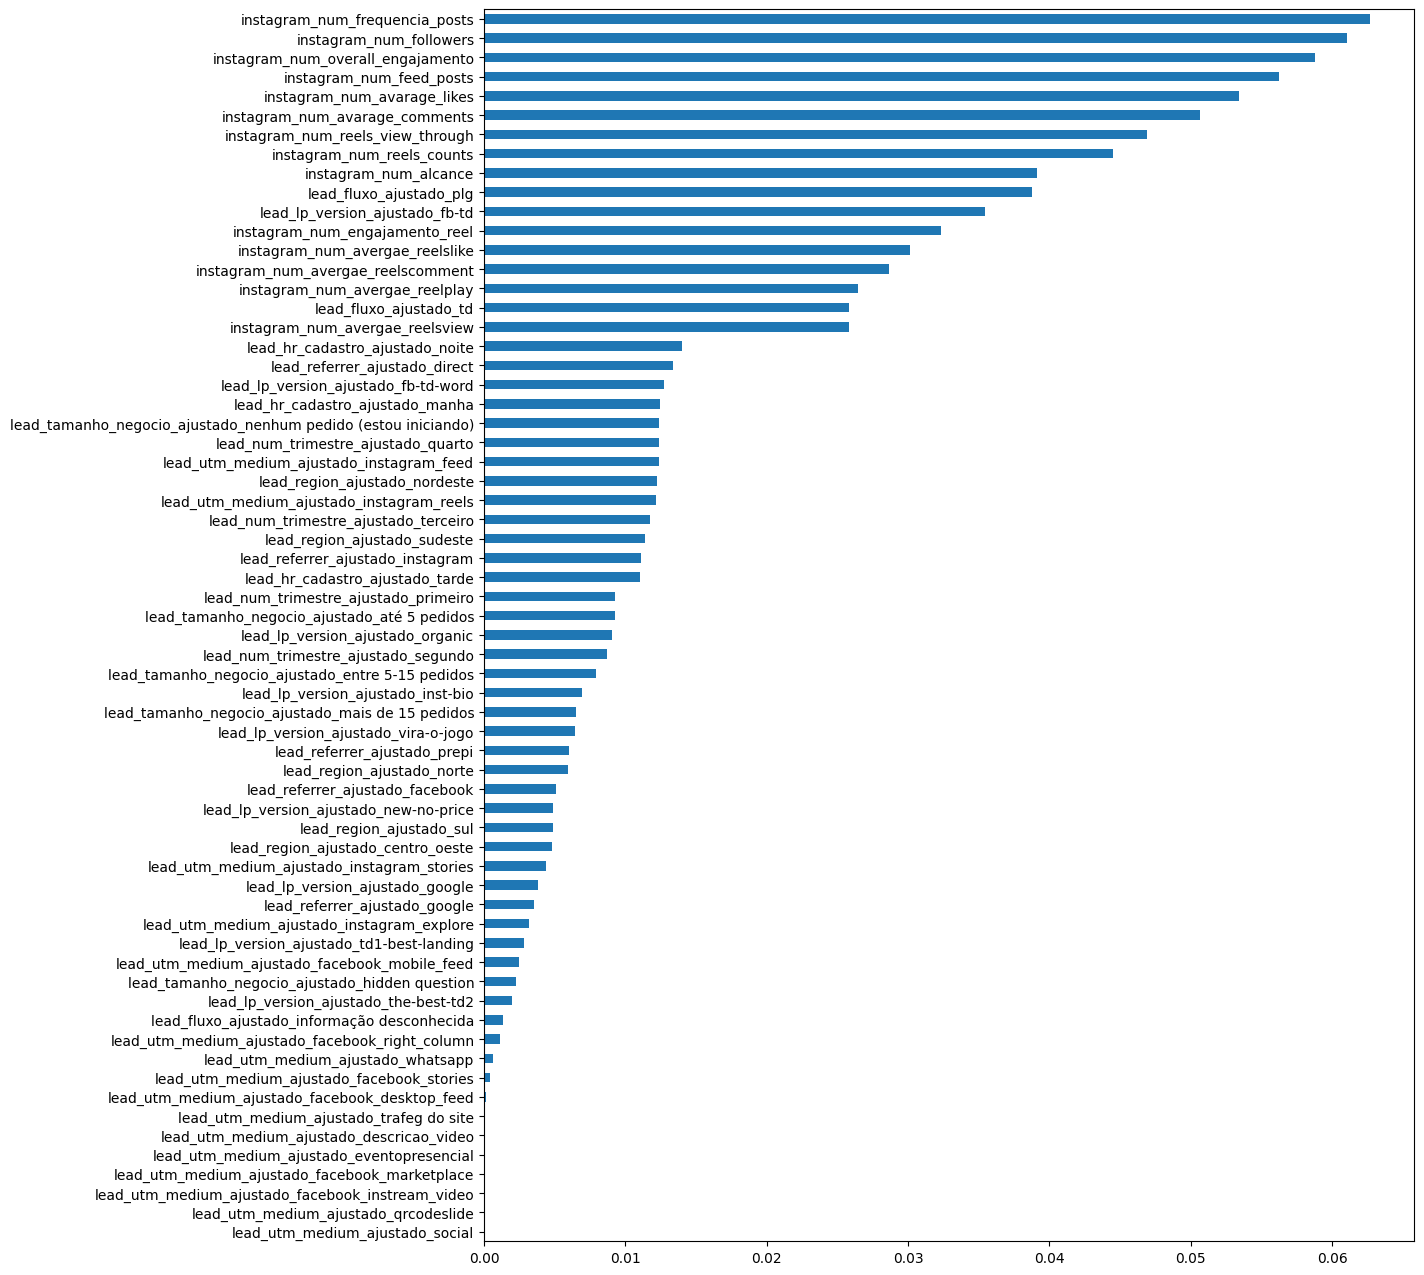

In [705]:
coefs = pd.Series(
    data=model_rf.feature_importances_,
    index=model_rf.feature_names_in_
)

plt.figure(figsize=(12,16))
coefs.sort_values().plot.barh()
plt.show()

In [706]:
!pip install shap

In [707]:
# import shap

# explainer = shap.TreeExplainer(model_rf)
# shap_values = explainer.shap_values(X_train[continuos_variables])

In [708]:
# shap.summary_plot(shap_values,X_train[continuos_variables], plot_type='bar')

In [709]:
X_train

,instagram_num_followers,instagram_num_feed_posts,instagram_num_frequencia_posts,instagram_num_overall_engajamento,instagram_num_avarage_comments,instagram_num_avarage_likes,instagram_num_reels_counts,instagram_num_avergae_reelplay,instagram_num_avergae_reelsview,instagram_num_avergae_reelslike,...,lead_referrer_ajustado_prepi,lead_region_ajustado_centro_oeste,lead_region_ajustado_nordeste,lead_region_ajustado_norte,lead_region_ajustado_sudeste,lead_region_ajustado_sul,lead_num_trimestre_ajustado_primeiro,lead_num_trimestre_ajustado_quarto,lead_num_trimestre_ajustado_segundo,lead_num_trimestre_ajustado_terceiro
id,,,,,,,,,,,,,,,,,,,,,
9223,0.008307,0.023135,0.000035,0.014762,0.126761,0.188854,0.363636,0.163611,0.222410,0.160535,...,0,0,0,0,1,0,0,1,0,0
9941,0.008169,0.014170,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,1,0,0,0,1,0,0,0
10354,0.003212,0.018219,0.466216,0.002911,0.000000,0.016099,0.000000,0.000000,0.000000,0.000000,...,0,0,0,1,0,0,1,0,0,0
18304,0.018276,0.036726,0.001521,0.130952,0.000000,0.074923,0.818182,0.385597,0.470530,0.853214,...,0,0,0,0,1,0,0,0,1,0
24617,0.154242,0.987854,0.002364,0.000324,0.017606,0.082972,0.818182,0.261184,0.322256,0.487551,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8660,0.042728,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0.008256,0.012433,0.000000,...,1,0,0,0,0,0,0,0,0,1
4580,0.002132,0.040486,0.000059,0.005229,0.021127,0.015480,0.000000,0.000000,0.000000,0.000000,...,0,0,0,1,0,0,0,0,0,1
22128,0.000055,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,1,0,0,0,0,0,0,1


In [710]:
X_train_cat = X_train.drop(X_train[continuos_variables], axis=1)
X_train_cat.columns

Index(['lead_hr_cadastro_ajustado_manha', 'lead_hr_cadastro_ajustado_noite',
       'lead_hr_cadastro_ajustado_tarde',
       'lead_fluxo_ajustado_informação desconhecida',
       'lead_fluxo_ajustado_plg', 'lead_fluxo_ajustado_td',
       'lead_tamanho_negocio_ajustado_até 5 pedidos',
       'lead_tamanho_negocio_ajustado_entre 5-15 pedidos',
       'lead_tamanho_negocio_ajustado_hidden question',
       'lead_tamanho_negocio_ajustado_mais de 15 pedidos',
       'lead_tamanho_negocio_ajustado_nenhum pedido (estou iniciando)',
       'lead_utm_medium_ajustado_descricao_video',
       'lead_utm_medium_ajustado_eventopresencial',
       'lead_utm_medium_ajustado_facebook_desktop_feed',
       'lead_utm_medium_ajustado_facebook_instream_video',
       'lead_utm_medium_ajustado_facebook_marketplace',
       'lead_utm_medium_ajustado_facebook_mobile_feed',
       'lead_utm_medium_ajustado_facebook_right_column',
       'lead_utm_medium_ajustado_facebook_stories',
       'lead_utm_medium_aju

In [711]:
# Reruning the Feature Importance with a Benchmark

X_train_random = X_train.copy()
X_train_random['RANDOM'] = np.random.RandomState(42).randn(X_train.shape[0])

rf_random = RandomForestClassifier(bootstrap = False,
                                  max_depth = None,
                                  max_features = 'sqrt',
                                  n_estimators = 100,
                                  min_samples_split = 4)

rf_random.fit(X_train_random, y_train)


global_importances_random = pd.Series(rf_random.feature_importances_, index=X_train_random.columns)
global_importances_random.sort_values(ascending=True, inplace=True)

Text(0.5, 1.0, 'Global Feature Importance - Built-in Method')

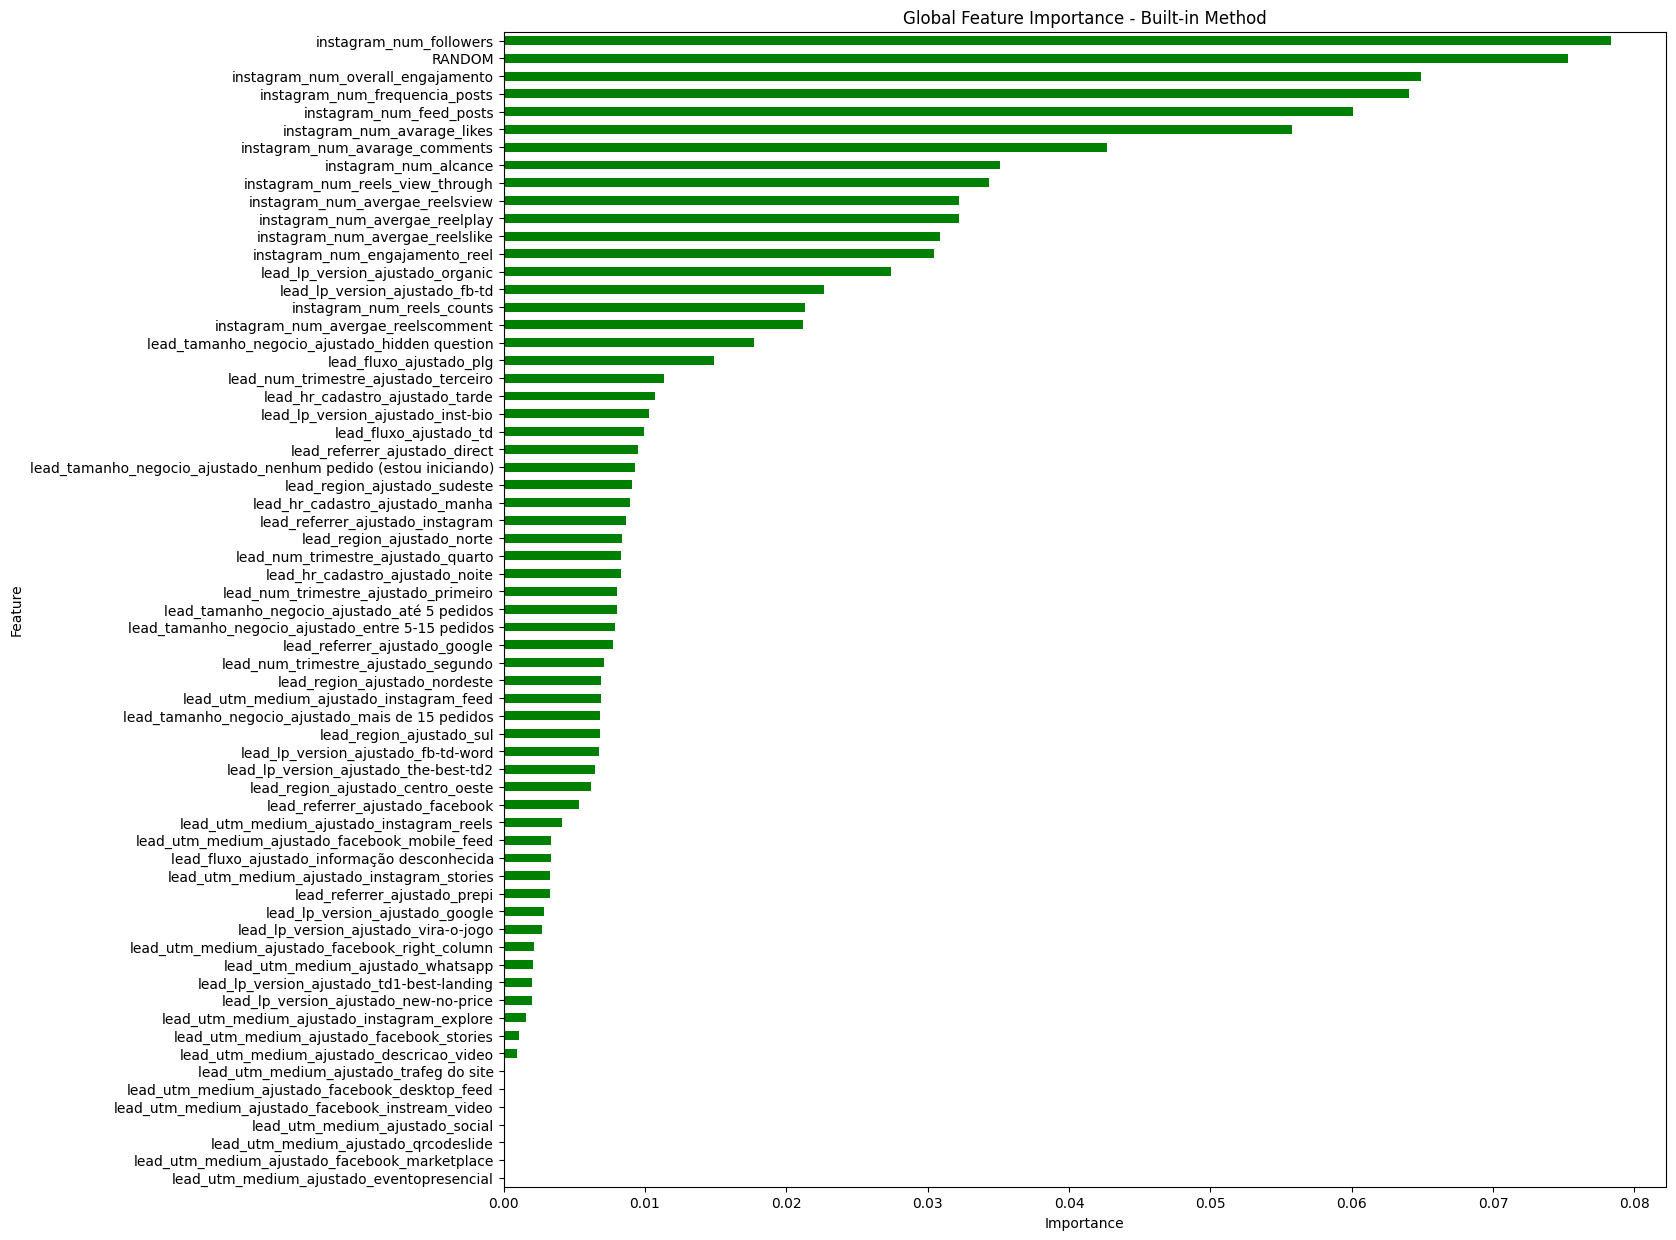

In [712]:
values = X_train_random.columns
plt.figure(figsize=(15,15))
global_importances_random.plot.barh(color='green')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Global Feature Importance - Built-in Method")

#### Lime

In [713]:
!pip install lime

In [714]:
import lime
from lime import lime_text
from sklearn.pipeline import make_pipeline
from lime.lime_text import LimeTextExplainer
import lime.lime_tabular

In [715]:
predict_fn_rf = lambda x: model_rf.predict_proba(x).astype(float)
X = X_train.values
explainer = lime.lime_tabular.LimeTabularExplainer(X,feature_names = X_train.columns,class_names=['dont_became_client','became_client'],kernel_width=5)

In [716]:
index_best = X_test_final.index[0:10].to_list()
n=0

for i in index_best:
  choosen_instance = X_test.loc[[i]].values[0]
  exp = explainer.explain_instance(choosen_instance, predict_fn_rf,num_features=10)
  n=n+1
  print(f'index: {i} \nPosition: {n}\n')
  exp.show_in_notebook(show_all=False)
  print('============================================================================================================')

Output hidden; open in https://colab.research.google.com to view.

### Results avaliation

<ipython-input-717-0ffeb0aae28f>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



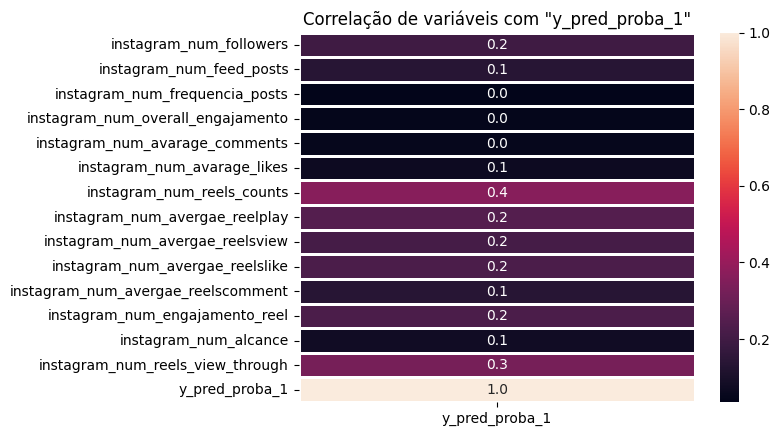

In [717]:
X_test_final_corr = X_test_final[continuos_variables]
X_test_final_corr['y_pred_proba_1'] = X_test_final['y_pred_proba_1']
correlation = X_test_final_corr.corr()
sns.heatmap(correlation[['y_pred_proba_1']], annot=True, fmt=".1f", linewidths=0.8)
plt.title('Correlação de variáveis com "y_pred_proba_1"')
plt.show()

In [718]:
X_test_final_best = X_test_final[X_test_final['y_pred_proba_1'] >= 0.5]
X_test_final_best

,instagram_num_followers,instagram_num_feed_posts,instagram_num_frequencia_posts,instagram_num_overall_engajamento,instagram_num_avarage_comments,instagram_num_avarage_likes,instagram_num_reels_counts,instagram_num_avergae_reelplay,instagram_num_avergae_reelsview,instagram_num_avergae_reelslike,...,lead_region_ajustado_sudeste,lead_region_ajustado_sul,lead_num_trimestre_ajustado_primeiro,lead_num_trimestre_ajustado_quarto,lead_num_trimestre_ajustado_segundo,lead_num_trimestre_ajustado_terceiro,y_pred_test,y_test,y_pred_proba_0,y_pred_proba_1
id,,,,,,,,,,,,,,,,,,,,,
27888,0.001689,0.012146,0.123967,0.002342,0.010563,0.004954,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,1,1,0.00,1.00
30723,0.063746,0.016484,0.000580,0.000090,0.000000,0.009907,0.000000,0.000000,0.000000,0.000000,...,0,0,1,0,0,0,1,0,0.07,0.93
25847,0.015923,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1,0,0,1,0,0,1,0,0.14,0.86
10138,0.021267,0.048005,0.000030,0.001911,0.017606,0.066873,0.272727,0.071313,0.031543,0.035674,...,1,0,1,0,0,0,1,1,0.16,0.84
10987,0.008972,0.030364,0.000130,0.000561,0.007042,0.007430,0.000000,0.000000,0.000000,0.000000,...,1,0,1,0,0,0,1,0,0.18,0.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20117,0.176922,0.268652,0.004168,0.529221,0.169014,0.273065,0.636364,0.215673,0.264149,0.246536,...,1,0,0,0,0,1,0,0,0.50,0.50
25373,0.001468,0.017351,0.000107,0.008821,0.010563,0.020433,0.181818,0.027319,0.028665,0.120401,...,1,0,0,1,0,0,0,1,0.50,0.50
9338,0.032122,0.040197,0.000145,0.001120,0.021127,0.058204,0.181818,0.273555,0.226899,0.321070,...,0,0,0,1,0,0,0,1,0.50,0.50


In [719]:
X_test_final_best.describe(percentiles=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])

,instagram_num_followers,instagram_num_feed_posts,instagram_num_frequencia_posts,instagram_num_overall_engajamento,instagram_num_avarage_comments,instagram_num_avarage_likes,instagram_num_reels_counts,instagram_num_avergae_reelplay,instagram_num_avergae_reelsview,instagram_num_avergae_reelslike,...,lead_region_ajustado_sudeste,lead_region_ajustado_sul,lead_num_trimestre_ajustado_primeiro,lead_num_trimestre_ajustado_quarto,lead_num_trimestre_ajustado_segundo,lead_num_trimestre_ajustado_terceiro,y_pred_test,y_test,y_pred_proba_0,y_pred_proba_1
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,...,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,0.045472,0.047842,0.012493,0.036036,0.022970,0.060508,0.390332,0.111729,0.111745,0.169134,...,0.468254,0.063492,0.238095,0.238095,0.126984,0.333333,0.936508,0.388889,0.385079,0.614921
std,0.083535,0.082794,0.061901,0.085085,0.042102,0.060403,0.323016,0.127816,0.137017,0.173198,...,0.500983,0.244819,0.427618,0.427618,0.334284,0.473286,0.244819,0.489444,0.100102,0.100102
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000
10%,0.002686,0.002892,0.000031,0.000252,0.000000,0.004954,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.245000,0.510000
20%,0.005151,0.006362,0.000066,0.000469,0.000000,0.014861,0.090909,0.000971,0.001381,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.310000,0.530000
30%,0.008903,0.008965,0.000107,0.000773,0.003521,0.024458,0.181818,0.032110,0.030276,0.064660,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.355000,0.545000
40%,0.014953,0.013013,0.000174,0.001005,0.007042,0.033437,0.272727,0.052477,0.046738,0.093645,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.380000,0.570000
50%,0.020976,0.017785,0.000285,0.001811,0.010563,0.043034,0.272727,0.073824,0.066309,0.127090,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.410000,0.590000
60%,0.031845,0.030075,0.000450,0.002786,0.014085,0.058204,0.454545,0.094059,0.089102,0.169454,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.430000,0.620000


In [720]:
X_test_final_best[continuos_variables]

,instagram_num_followers,instagram_num_feed_posts,instagram_num_frequencia_posts,instagram_num_overall_engajamento,instagram_num_avarage_comments,instagram_num_avarage_likes,instagram_num_reels_counts,instagram_num_avergae_reelplay,instagram_num_avergae_reelsview,instagram_num_avergae_reelslike,instagram_num_avergae_reelscomment,instagram_num_engajamento_reel,instagram_num_alcance,instagram_num_reels_view_through
id,,,,,,,,,,,,,,
27888,0.001689,0.012146,0.123967,0.002342,0.010563,0.004954,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
30723,0.063746,0.016484,0.000580,0.000090,0.000000,0.009907,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25847,0.015923,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10138,0.021267,0.048005,0.000030,0.001911,0.017606,0.066873,0.272727,0.071313,0.031543,0.035674,0.000000,0.035180,0.033068,0.187391
10987,0.008972,0.030364,0.000130,0.000561,0.007042,0.007430,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20117,0.176922,0.268652,0.004168,0.529221,0.169014,0.273065,0.636364,0.215673,0.264149,0.246536,0.099248,0.254429,0.012022,0.518886
25373,0.001468,0.017351,0.000107,0.008821,0.010563,0.020433,0.181818,0.027319,0.028665,0.120401,0.000000,0.118734,0.183565,0.444529
9338,0.032122,0.040197,0.000145,0.001120,0.021127,0.058204,0.181818,0.273555,0.226899,0.321070,0.347368,0.356201,0.083982,0.351405


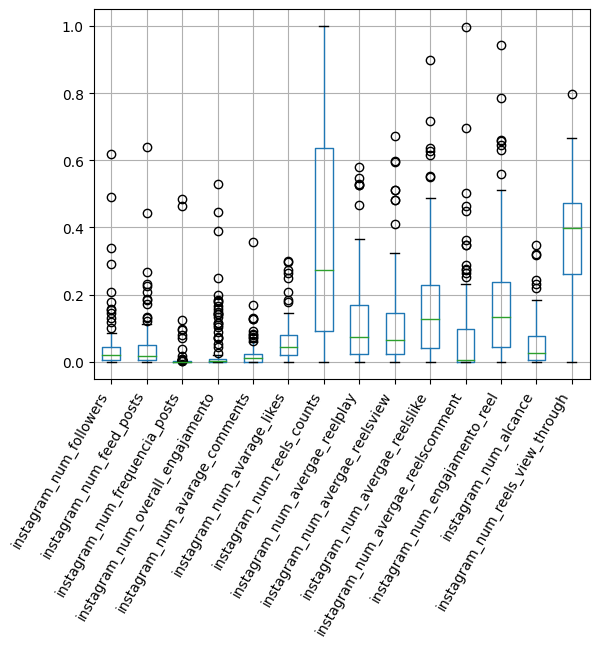

In [721]:
X_test_final_best[continuos_variables].boxplot()
plt.xticks(rotation=60, ha= 'right')
plt.show()

In [722]:
for i in X_test_final_best[continuos_variables].columns:
  fig = px.scatter(X_test_final_best ,x=i, y='y_pred_proba_1', trendline='ols', width=700, height=700)
  plt.figure(figsize=(10,10))
  fig.show()

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

In [723]:
sum_plot = X_test_final[X_test_final.columns.drop(list(continuos_variables))].columns
sum_plot = pd.DataFrame(sum_plot, columns=['columns'])
sum_plot

,columns
0,lead_hr_cadastro_ajustado_manha
1,lead_hr_cadastro_ajustado_noite
2,lead_hr_cadastro_ajustado_tarde
3,lead_fluxo_ajustado_informação desconhecida
4,lead_fluxo_ajustado_plg
5,lead_fluxo_ajustado_td
6,lead_tamanho_negocio_ajustado_até 5 pedidos
7,lead_tamanho_negocio_ajustado_entre 5-15 pedidos
8,lead_tamanho_negocio_ajustado_hidden question
9,lead_tamanho_negocio_ajustado_mais de 15 pedidos


In [724]:
X_test_final_80 = X_test_final[X_test_final['y_pred_proba_1'] >= 0.8]

In [725]:
sum_value_column = []


for i in sum_plot['columns']:
  sum_value = X_test_final_80[i].sum()
  sum_value_column.append(sum_value)


sum_plot['sum_value_column'] = sum_value_column
print(sum_plot)


                                              columns  sum_value_column
0                     lead_hr_cadastro_ajustado_manha              2.00
1                     lead_hr_cadastro_ajustado_noite              3.00
2                     lead_hr_cadastro_ajustado_tarde              4.00
3         lead_fluxo_ajustado_informação desconhecida              1.00
4                             lead_fluxo_ajustado_plg              0.00
5                              lead_fluxo_ajustado_td              8.00
6         lead_tamanho_negocio_ajustado_até 5 pedidos              0.00
7    lead_tamanho_negocio_ajustado_entre 5-15 pedidos              0.00
8       lead_tamanho_negocio_ajustado_hidden question              1.00
9    lead_tamanho_negocio_ajustado_mais de 15 pedidos              3.00
10  lead_tamanho_negocio_ajustado_nenhum pedido (e...              5.00
11           lead_utm_medium_ajustado_descricao_video              0.00
12          lead_utm_medium_ajustado_eventopresencial           

In [726]:
sum_plot.drop([50,51,52,53], axis=0,inplace=True)
sum_plot

,columns,sum_value_column
0,lead_hr_cadastro_ajustado_manha,2.0
1,lead_hr_cadastro_ajustado_noite,3.0
2,lead_hr_cadastro_ajustado_tarde,4.0
3,lead_fluxo_ajustado_informação desconhecida,1.0
4,lead_fluxo_ajustado_plg,0.0
5,lead_fluxo_ajustado_td,8.0
6,lead_tamanho_negocio_ajustado_até 5 pedidos,0.0
7,lead_tamanho_negocio_ajustado_entre 5-15 pedidos,0.0
8,lead_tamanho_negocio_ajustado_hidden question,1.0
9,lead_tamanho_negocio_ajustado_mais de 15 pedidos,3.0


In [727]:
fig = px.bar(sum_plot, x='columns', y='sum_value_column')
fig.show()

### Tunning - Randomized Search

In [728]:
from sklearn.model_selection import RandomizedSearchCV

In [729]:
rfc = RandomForestClassifier()

In [730]:
# 'bootstrap': [True,False],
#               'max_depth': [10,15,20, None],
#               'min_samples_split':[2,4,6,8],
#               'max_features': ['sqrt','log2'],
#               'n_estimators': [10,50,100,200,300]}

In [731]:
parameters = {'bootstrap': [False],
              'max_depth': [None],
              'min_samples_split':[2,4,6,8],
              'max_features': ['sqrt','log2'],
              'n_estimators': [10,50,100,200,300]}

random_search = RandomizedSearchCV(rfc, parameters, scoring='roc_auc', cv=5, n_iter=5, n_jobs=-1)
random_search.fit(X_train_res,y_train_res)

KeyboardInterrupt: ignored

In [ ]:
# Extracting best parameters
random_search.best_estimator_

In [ ]:
# Creating a table with the grid_search results

results_random = pd.DataFrame(random_search.cv_results_)

# Ranking results

results_random.sort_values(by='rank_test_score')

In [ ]:
y_pred = random_search.predict(X_test)

print('Accuracy Test: ',accuracy_score(y_test,y_pred)*100)
print('F1 Test: ',f1_score(y_test,y_pred,average='weighted')*100)